Libraries Used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Analysis:**
This analysis examines the behavioral patterns of telecom customers who are at a higher risk of leaving the platform. Through exploratory data analysis (EDA), I aim to identify the most significant trends that influence customer churn. Subsequently, I will apply predictive analytics techniques to assess and determine which customers are most likely to discontinue their service. By leveraging data-driven insights, this study seeks to provide valuable recommendations for improving customer retention strategies and minimizing churn rates. The findings will enable telecom providers to proactively address customer concerns and enhance overall satisfaction, ensuring sustained engagement with their services.

# ***Data:***

**CustomerID:** A unique ID that identifies each customer.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicates if the customer is married: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No.
            Dependents could be children, parents, grandparents, etc.

**Tenure:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge: **Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn:** Yes = the customer left the company this quarter. No = the customer remained with the company.

The raw data contains 7043 rows (customers) and 21 columns (features). This data divided into two major datasets.  

Each dataset splitted into 5 small samples. The first 5 small samples are used the following supervised alogrithms for classification with train, test data:
Support Vector Machine (SVM)
Naive Bayes Bernoulli (NVB)
Decision Tree Classifier (DT)

With standard scalar method the same algorithms applied for the same 5 small sample datasets.

The next major dataset without training the data the same algorithms applied for the 5 small sample datasets to find the accuracy of the data.

In [ ]:
from google.colab import files
churndata = files.upload()

Saving POC_Telco_churn_original.csv to POC_Telco_churn_original (1).csv


In [ ]:
churn = pd.read_csv('POC_Telco_churn_original.csv')

In [ ]:
churn.shape

(7043, 21)

Understanding the data:

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [ ]:
churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender and if they have partners and dependents

In [ ]:
churn.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [ ]:
churn.iloc[3330:3335]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
3330  8276-MQBYC    Male              1      No         No      51   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3332  7593-XFKDI    Male              0      No         No       1   
3333  4573-JKNAE    Male              0      No        Yes      12   
3334  0337-CNPZE  Female              0      No         No      41   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
3330          Yes           Yes     Fiber optic                   No  ...   
3331          Yes            No              No  No internet service  ...   
3332          Yes            No             DSL                   No  ...   
3333          Yes            No              No  No internet service  ...   
3334          Yes           Yes     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
3330                  Yes                   No                  Yes   
3331  No internet service  No internet service  No internet service   
3332                   No                   No                   No   
3333  No internet service  No internet service  No internet service   
3334                  Yes                   No                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
3330                  Yes  Month-to-month              Yes   
3331  No internet service        Two year               No   
3332                   No  Month-to-month               No   
3333  No internet service        Two year               No   
3334                  Yes  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
3330           Electronic check          97.80        4913.3   Yes  
3331               Mailed check          19.85                  No  
3332               Mailed check          46.30          46.3   Yes  
3333  Bank transfer (automatic)          19.35         212.3    No  
3334           Electronic check         106.30       4443.45   Yes  

[5 rows x 21 columns]

In [ ]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Impute missing values**
There are eleven missing values in TotalCharges for some of the customers with zero tenure. We can impute these values with zero as these customers probably haven't paid any bills yet.

In [ ]:
churn['TotalCharges'] = churn['TotalCharges'].replace(" ", 0).astype('float64')

In [ ]:
churn.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

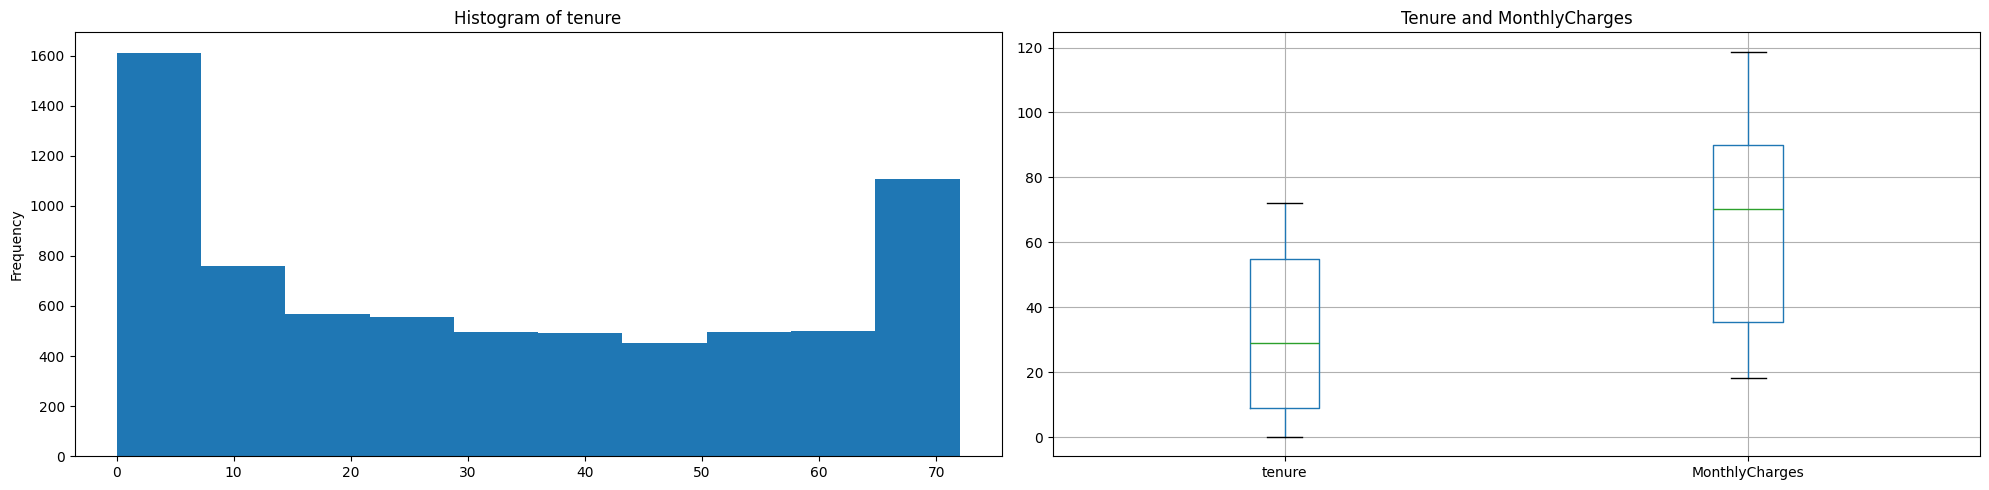

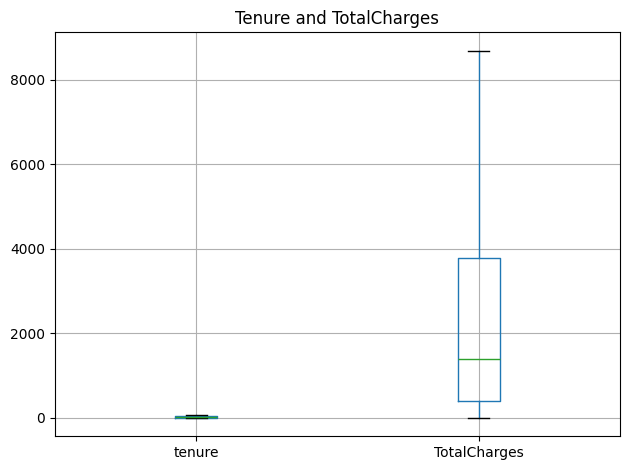

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

churn['tenure'].plot(kind='hist', title='Histogram of tenure')
plt.subplot(1, 2, 2)

churn.boxplot(column=['tenure', 'MonthlyCharges'])
plt.title('Tenure and MonthlyCharges')
plt.tight_layout()
plt.show()

churn.boxplot(column=['tenure', 'TotalCharges'])
plt.title('Tenure and TotalCharges')
plt.tight_layout()
plt.show()

Tenure: After looking at the above histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

<ipython-input-19-c693dffa8675>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'No')],
<ipython-input-19-c693dffa8675>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'Yes')],


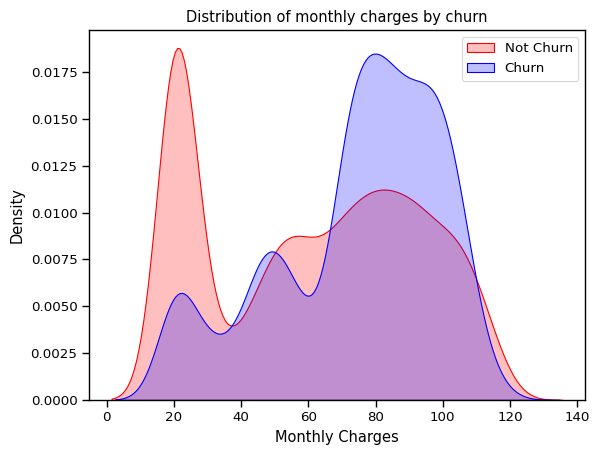

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'No')],
                color="Red", shade = True);
ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'Yes')],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

<ipython-input-20-a9567480120c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'No') ],
<ipython-input-20-a9567480120c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'Yes') ],


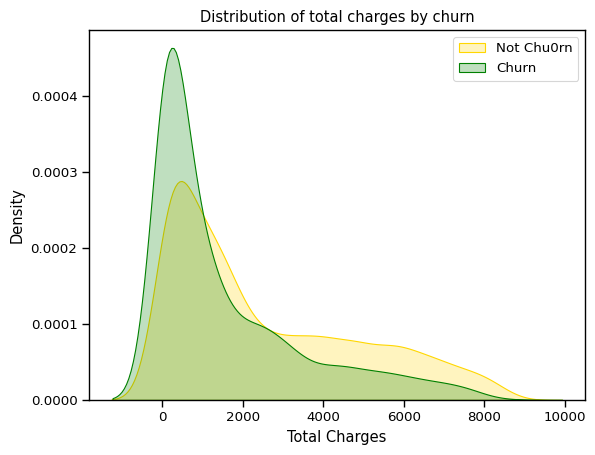

In [ ]:
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Visualize missing values:
In fact there is no missing data.

In [ ]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Finally, let's take a look at out target variable (Churn) and understand its interaction with other important variables.

Lets first look at the churn rate in our data

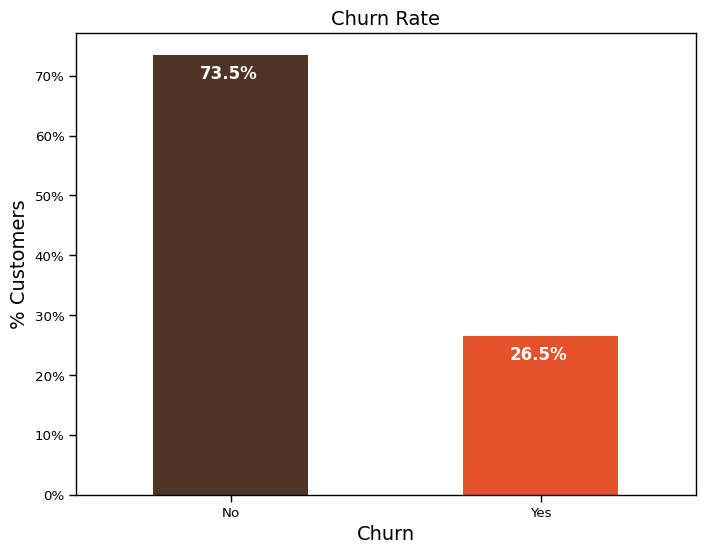

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
ax = (churn['Churn'].value_counts()*100.0 /len(churn)).plot(kind='bar', stacked = True,
                                                                    rot = 0,
                                                                    color = colors,
                                                                   figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In our data, 73.5% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Lets now explore the churn rate by tenure, monthly charges and total charges to see how it varies by these variables.

Loading a data file of sample 1:

In [ ]:
from google.colab import files
d1 = files.upload()

Saving POC_Telco_Sample_1.xlsx to POC_Telco_Sample_1 (1).xlsx


In [ ]:
df1 = pd.read_excel('POC_Telco_Sample_1.xlsx')

Data Preprocessing:

In [ ]:
df1.shape

(704, 21)

In [ ]:
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df1.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
699  8338-QIUNR    Male              0     Yes        Yes      72   
700  1525-LNLOJ    Male              0     Yes        Yes      66   
701  9450-TRJUU    Male              0      No         No      35   
702  1766-GKNMI    Male              0      No         No      29   
703  6942-LBFDP  Female              0      No         No       2   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
699          Yes           Yes             DSL                  Yes  ...   
700          Yes           Yes             DSL                   No  ...   
701          Yes           Yes     Fiber optic                   No  ...   
702          Yes           Yes     Fiber optic                   No  ...   
703          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
699                  Yes                  Yes                   No   
700                  Yes                   No                  Yes   
701                   No                   No                  Yes   
702                   No                   No                   No   
703  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
699                   No        Two year              Yes   
700                   No        Two year              Yes   
701                   No  Month-to-month               No   
702                  Yes  Month-to-month              Yes   
703  No internet service  Month-to-month              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
699    Credit card (automatic)          66.50        4811.6    No  
700  Bank transfer (automatic)          63.30        4189.7    No  
701           Electronic check          83.15       2848.45    No  
702           Electronic check          84.90        2516.2    No  
703               Mailed check          20.55          33.6    No  

[5 rows x 21 columns]

In [ ]:
df1.iloc[488:493]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488  4472-LVYGI  Female              0     Yes        Yes       0   
489  8372-JUXUI    Male              0      No        Yes       1   
490  3552-CTCYF    Male              0     Yes        Yes      63   
491  6778-YSNIH  Female              0      No         No       2   
492  0388-EOPEX  Female              0     Yes         No       2   

    PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
488           No  No phone service             DSL            Yes  ...   
489          Yes               Yes     Fiber optic             No  ...   
490          Yes               Yes     Fiber optic             No  ...   
491          Yes                No             DSL             No  ...   
492          Yes                No     Fiber optic            Yes  ...   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
488              Yes         Yes         Yes              No        Two year   
489               No          No          No              No  Month-to-month   
490              Yes          No         Yes             Yes        Two year   
491               No          No         Yes              No  Month-to-month   
492               No          No          No              No  Month-to-month   

    PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
488              Yes  Bank transfer (automatic)          52.55                 
489              Yes           Electronic check          74.35         74.35   
490              Yes  Bank transfer (automatic)         104.80       6597.25   
491              Yes           Electronic check          59.00        114.15   
492              Yes           Electronic check          74.40         139.4   

    Churn  
488    No  
489   Yes  
490    No  
491    No  
492   Yes  

[5 rows x 21 columns]

In [ ]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        704 non-null    object 
 1   gender            704 non-null    object 
 2   SeniorCitizen     704 non-null    int64  
 3   Partner           704 non-null    object 
 4   Dependents        704 non-null    object 
 5   tenure            704 non-null    int64  
 6   PhoneService      704 non-null    object 
 7   MultipleLines     704 non-null    object 
 8   InternetService   704 non-null    object 
 9   OnlineSecurity    704 non-null    object 
 10  OnlineBackup      704 non-null    object 
 11  DeviceProtection  704 non-null    object 
 12  TechSupport       704 non-null    object 
 13  StreamingTV       704 non-null    object 
 14  StreamingMovies   704 non-null    object 
 15  Contract          704 non-null    object 
 16  PaperlessBilling  704 non-null    object 
 1

In [ ]:
df1['TotalCharges'] = df1['TotalCharges'].replace(" ", 0).astype('float64')

<ipython-input-32-f609c57b1793>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['TotalCharges'] = df1['TotalCharges'].replace(" ", 0).astype('float64')


In [ ]:
df1.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     704.000000  704.000000      704.000000    704.000000
mean        0.170455   32.053977       66.403906   2314.942685
std         0.376299   24.648480       29.859578   2275.634798
min         0.000000    0.000000       18.950000      0.000000
25%         0.000000    8.000000       44.225000    413.062500
50%         0.000000   29.000000       73.375000   1412.350000
75%         0.000000   55.000000       90.050000   3861.362500
max         1.000000   72.000000      116.250000   8468.200000

In [ ]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
from sklearn import preprocessing
le_df1 = preprocessing.LabelEncoder()

Here as we know we can’t have character values for our ML model so hence we should convert it into binary numerical values i.e. Yes=1; No=0

In [ ]:
df1['Churn'] = le_df1.fit_transform(df1['Churn'])

Now let's take a quick look at the relation between monthly and total charges

We will observe that the total charges increases as the monthly bill for a customer increases.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

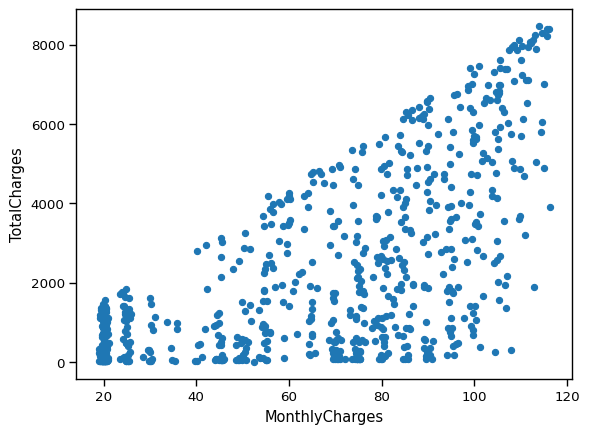

In [ ]:
df1[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

Feature Selection:

In [ ]:
df1=df1.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          704 non-null    int64  
 1   MonthlyCharges  704 non-null    float64
 2   TotalCharges    704 non-null    float64
 3   Churn           704 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.1 KB


In [ ]:
df1.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  704.000000      704.000000    704.000000  704.000000
mean    32.053977       66.403906   2314.942685    0.250000
std     24.648480       29.859578   2275.634798    0.433321
min      0.000000       18.950000      0.000000    0.000000
25%      8.000000       44.225000    413.062500    0.000000
50%     29.000000       73.375000   1412.350000    0.000000
75%     55.000000       90.050000   3861.362500    0.250000
max     72.000000      116.250000   8468.200000    1.000000

In [ ]:
x1 = df1.iloc[:,[0,1,2]]
y1 = df1.iloc[:,3]

In [ ]:
x1

tenure  MonthlyCharges  TotalCharges
0         1           29.85         29.85
1        34           56.95       1889.50
2         2           53.85        108.15
3        45           42.30       1840.75
4         2           70.70        151.65
..      ...             ...           ...
699      72           66.50       4811.60
700      66           63.30       4189.70
701      35           83.15       2848.45
702      29           84.90       2516.20
703       2           20.55         33.60

[704 rows x 3 columns]

In [ ]:
y1

0      0
1      0
2      1
3      0
4      1
      ..
699    0
700    0
701    0
702    0
703    0
Name: Churn, Length: 704, dtype: int64

**Plotting of corr() function:**
The corr() used to find the pairwise correlation of tenure, monthly charges and total charges columns in the dataframe. Missing values excluded in the calculation. Correlation uncovers the complex and unknown relationships between the variables in the dataset. The most common and default correlation coefficient is Pearson’s correlation coefficient.

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.251080      0.833232
MonthlyCharges  0.251080        1.000000      0.642725
TotalCharges    0.833232        0.642725      1.000000


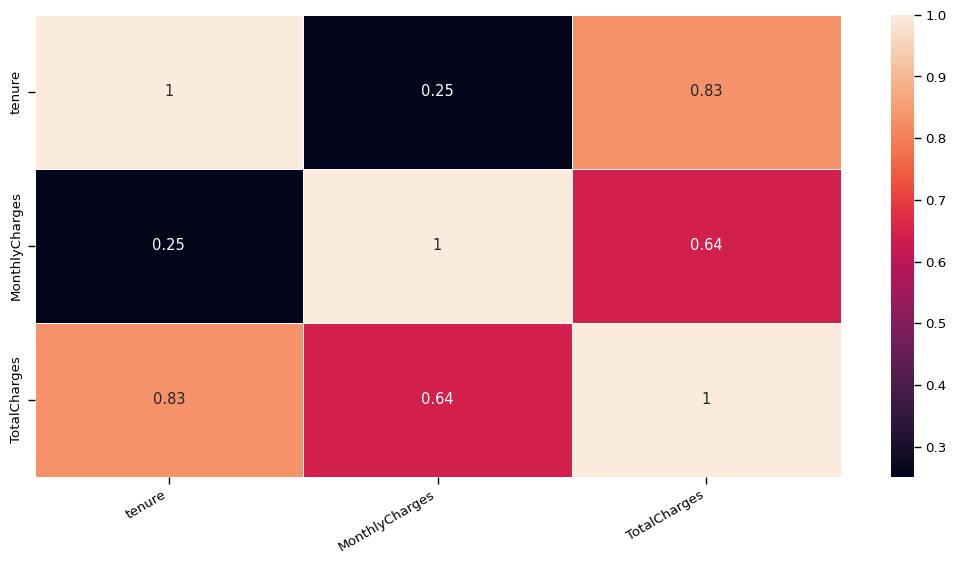

In [ ]:
corrmat = df1[['tenure', 'MonthlyCharges', 'TotalCharges']].corr() # Select the desired columns and then apply corr()
print(corrmat)
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

x,y train, test split:

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.2, random_state=345)

In [ ]:
x_train1.shape

(563, 3)

In [ ]:
x_test1.shape

(141, 3)

In [ ]:
y_train1.shape

(563,)

In [ ]:
y_test1.shape

(141,)

Model building:

In [ ]:
from sklearn.svm import SVC

In [ ]:
df1svc1 = SVC()

In [ ]:
df1svc1.fit(x_train1,y_train1)

SVC()

In [ ]:
y_predict1 = df1svc1.predict(x_test1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test1, y_predict1)

In [ ]:
cm1

array([[106,   0],
       [ 35,   0]])

In [ ]:
print(classification_report(y_test1,y_predict1))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       106
           1       0.00      0.00      0.00        35

    accuracy                           0.75       141
   macro avg       0.38      0.50      0.43       141
weighted avg       0.57      0.75      0.65       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


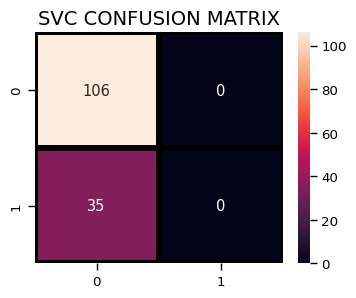

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test1, y_predict1),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("SVC CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
df1b1 = BernoulliNB()

In [ ]:
df1b1.fit(x_train1,y_train1)

BernoulliNB()

In [ ]:
y_predict2 = df1b1.predict(x_test1)

In [ ]:
cm2 = confusion_matrix(y_test1,y_predict2)

In [ ]:
cm2

array([[105,   1],
       [ 35,   0]])

In [ ]:
print(classification_report(y_test1,y_predict2))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       106
           1       0.00      0.00      0.00        35

    accuracy                           0.74       141
   macro avg       0.38      0.50      0.43       141
weighted avg       0.56      0.74      0.64       141



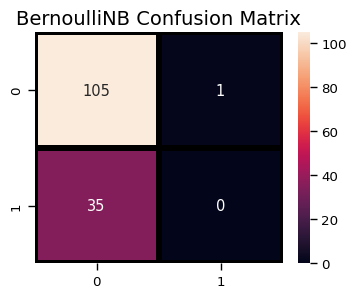

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test1, y_predict2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("BernoulliNB Confusion Matrix",fontsize=14)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df1dtc1 = DecisionTreeClassifier(random_state=234)
df1dtc1.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict3 = df1dtc1.predict(x_test1)

In [ ]:
cm3 = confusion_matrix(y_test1,y_predict3)

In [ ]:
cm3

array([[85, 21],
       [21, 14]])

In [ ]:
print(classification_report(y_test1,y_predict3))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       106
           1       0.40      0.40      0.40        35

    accuracy                           0.70       141
   macro avg       0.60      0.60      0.60       141
weighted avg       0.70      0.70      0.70       141



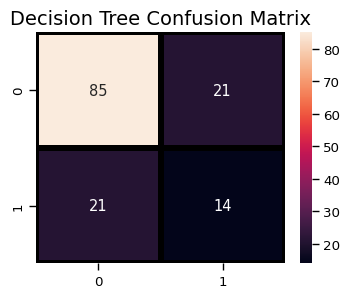

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test1, y_predict3),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Decision Tree Confusion Matrix",fontsize=14)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df1stds = StandardScaler()

In [ ]:
df1stds1 = SVC()

In [ ]:
x_train_stds1 = df1stds.fit_transform(x_train1)
x_test_stds1 = df1stds.transform(x_test1)

In [ ]:
df1stds1.fit(x_train_stds1,y_train1)

SVC()

In [ ]:
y_predict4 =df1stds1.predict(x_test_stds1)

In [ ]:
cm4 = confusion_matrix(y_test1, y_predict4)

In [ ]:
cm4

array([[94, 12],
       [23, 12]])

In [ ]:
print(classification_report(y_test1,y_predict4))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.50      0.34      0.41        35

    accuracy                           0.75       141
   macro avg       0.65      0.61      0.62       141
weighted avg       0.73      0.75      0.73       141



In [ ]:
df1b2 = BernoulliNB()

In [ ]:
df1b2.fit(x_train_stds1,y_train1)

BernoulliNB()

In [ ]:
y_predict5 = df1b2.predict(x_test_stds1)

In [ ]:
cm5 = confusion_matrix(y_test1, y_predict5)

In [ ]:
cm5

array([[92, 14],
       [19, 16]])

In [ ]:
print(classification_report(y_test1,y_predict5))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       106
           1       0.53      0.46      0.49        35

    accuracy                           0.77       141
   macro avg       0.68      0.66      0.67       141
weighted avg       0.76      0.77      0.76       141



In [ ]:
df1dtc2 = DecisionTreeClassifier(random_state=234)
df1dtc2.fit(x_train_stds1, y_train1)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict6 = df1dtc2.predict(x_test_stds1)

In [ ]:
cm6 = confusion_matrix(y_test1,y_predict6)

In [ ]:
cm6

array([[85, 21],
       [21, 14]])

In [ ]:
print(classification_report(y_test1,y_predict6))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       106
           1       0.40      0.40      0.40        35

    accuracy                           0.70       141
   macro avg       0.60      0.60      0.60       141
weighted avg       0.70      0.70      0.70       141



In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.5 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

In [ ]:
import optuna
import xgboost as xgb

In [ ]:
xgb_classificationdf1 = xgb.XGBClassifier()
xgb_classificationdf1.fit(x_train1, y_train1)
y_pred1 = xgb_classificationdf1.predict(x_test1)
cm7 = confusion_matrix(y_test1, y_pred1)
print(cm7)
print(classification_report(y_test1, y_pred1))

[[85 21]
 [20 15]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       106
           1       0.42      0.43      0.42        35

    accuracy                           0.71       141
   macro avg       0.61      0.62      0.61       141
weighted avg       0.71      0.71      0.71       141



In [ ]:
from google.colab import files
d2 = files.upload()

Saving POC_Telco_Sample_2.xlsx to POC_Telco_Sample_2.xlsx


In [ ]:
df2 = pd.read_excel('POC_Telco_Sample_2.xlsx')

Data Preprocessing:

In [ ]:
df2.shape

(705, 21)

In [ ]:
df2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  1456-TWCGB    Male              0      No         No       4          Yes   
1  7133-VBDCG  Female              0      No         No      25          Yes   
2  7596-ZYWBB  Female              0      No         No      65          Yes   
3  8329-UTMVM    Male              1      No         No      27          Yes   
4  3014-WJKSM    Male              0     Yes         No      29          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No     Fiber optic            Yes  ...               No   
2            No             DSL            Yes  ...               No   
3           Yes     Fiber optic             No  ...               No   
4            No     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month               No   
1          No          No              No  Month-to-month              Yes   
2         Yes          No              No        Two year              Yes   
3         Yes         Yes             Yes        One year              Yes   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0               Mailed check          49.25        208.45    No  
1  Bank transfer (automatic)          79.85       2015.35   Yes  
2               Mailed check          59.60        3739.8    No  
3  Bank transfer (automatic)         104.65          2964    No  
4    Credit card (automatic)          75.30        2263.4    No  

[5 rows x 21 columns]

In [ ]:
df2.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
700  1970-KKFWL  Female              0      No         No      35   
701  6960-HVYXR  Female              0      No         No       1   
702  9337-SRRNI    Male              0      No        Yes      66   
703  0895-UADGO    Male              0      No        Yes       8   
704  5678-VFNEQ  Female              0     Yes         No      71   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
700          Yes               Yes              No  No internet service  ...   
701          Yes               Yes     Fiber optic                   No  ...   
702          Yes               Yes              No  No internet service  ...   
703           No  No phone service             DSL                  Yes  ...   
704          Yes               Yes     Fiber optic                  Yes  ...   

        DeviceProtection          TechSupport          StreamingTV  \
700  No internet service  No internet service  No internet service   
701                   No                   No                   No   
702  No internet service  No internet service  No internet service   
703                   No                  Yes                   No   
704                  Yes                   No                  Yes   

         StreamingMovies        Contract PaperlessBilling  \
700  No internet service        Two year               No   
701                   No  Month-to-month               No   
702  No internet service        Two year              Yes   
703                  Yes        Two year              Yes   
704                  Yes        One year              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
700  Bank transfer (automatic)          23.30         797.1    No  
701           Electronic check          76.00            76   Yes  
702    Credit card (automatic)          25.30        1673.8    No  
703               Mailed check          44.55        343.45    No  
704    Credit card (automatic)         104.10       7412.25    No  

[5 rows x 21 columns]

In [ ]:
df2.iloc[48:53]

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
48  1410-RSCMR    Male              0     Yes        Yes       7          Yes   
49  3115-CZMZD    Male              0      No        Yes       0          Yes   
50  0139-IVFJG  Female              0     Yes         No       2          Yes   
51  6683-VLCTZ    Male              1      No         No      20          Yes   
52  5730-DBDSI    Male              0      No         No      66          Yes   

   MultipleLines InternetService       OnlineSecurity  ...  \
48            No             DSL                  Yes  ...   
49            No              No  No internet service  ...   
50            No     Fiber optic                  Yes  ...   
51           Yes     Fiber optic                   No  ...   
52            No              No  No internet service  ...   

       DeviceProtection          TechSupport          StreamingTV  \
48                  Yes                  Yes                   No   
49  No internet service  No internet service  No internet service   
50                   No                   No                  Yes   
51                  Yes                   No                  Yes   
52  No internet service  No internet service  No internet service   

        StreamingMovies        Contract PaperlessBilling  \
48                  Yes  Month-to-month              Yes   
49  No internet service        Two year               No   
50                   No  Month-to-month               No   
51                  Yes  Month-to-month              Yes   
52  No internet service        Two year               No   

                PaymentMethod MonthlyCharges  TotalCharges Churn  
48    Credit card (automatic)          71.35        515.75    No  
49               Mailed check          20.25                  No  
50           Electronic check          90.35         190.5    No  
51           Electronic check          98.55        1842.8   Yes  
52  Bank transfer (automatic)          19.70        1253.8    No  

[5 rows x 21 columns]

In [ ]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        705 non-null    object 
 1   gender            705 non-null    object 
 2   SeniorCitizen     705 non-null    int64  
 3   Partner           705 non-null    object 
 4   Dependents        705 non-null    object 
 5   tenure            705 non-null    int64  
 6   PhoneService      705 non-null    object 
 7   MultipleLines     705 non-null    object 
 8   InternetService   705 non-null    object 
 9   OnlineSecurity    705 non-null    object 
 10  OnlineBackup      705 non-null    object 
 11  DeviceProtection  705 non-null    object 
 12  TechSupport       705 non-null    object 
 13  StreamingTV       705 non-null    object 
 14  StreamingMovies   705 non-null    object 
 15  Contract          705 non-null    object 
 16  PaperlessBilling  705 non-null    object 
 1

In [ ]:
df2['TotalCharges'] = df2['TotalCharges'].replace(" ",0).astype('float64')

<ipython-input-104-fa4a90eb9414>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['TotalCharges'] = df2['TotalCharges'].replace(" ",0).astype('float64')


In [ ]:
df2.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     705.000000  705.000000      705.000000    705.000000
mean        0.144681   31.997163       65.613333   2254.629078
std         0.352029   24.612624       29.594697   2220.299594
min         0.000000    0.000000       18.700000      0.000000
25%         0.000000    9.000000       39.600000    417.700000
50%         0.000000   27.000000       73.050000   1430.250000
75%         0.000000   56.000000       89.550000   3858.050000
max         1.000000   72.000000      116.100000   8476.500000

Visualize missing values:
In fact there is no missing data.

In [ ]:
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
from sklearn import preprocessing
le2 = preprocessing.LabelEncoder()

In [ ]:
df2['Churn'] = le2.fit_transform(df2['Churn'])

Feature Selection:

In [ ]:
df2=df2.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          705 non-null    int64  
 1   MonthlyCharges  705 non-null    float64
 2   TotalCharges    705 non-null    float64
 3   Churn           705 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.2 KB


In [ ]:
df2.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  705.000000      705.000000    705.000000  705.000000
mean    31.997163       65.613333   2254.629078    0.279433
std     24.612624       29.594697   2220.299594    0.449039
min      0.000000       18.700000      0.000000    0.000000
25%      9.000000       39.600000    417.700000    0.000000
50%     27.000000       73.050000   1430.250000    0.000000
75%     56.000000       89.550000   3858.050000    1.000000
max     72.000000      116.100000   8476.500000    1.000000

In [ ]:
x2 = df2.iloc[:,[0,1,2]]
y2 = df2.iloc[:,3]

In [ ]:
x2

tenure  MonthlyCharges  TotalCharges
0         4           49.25        208.45
1        25           79.85       2015.35
2        65           59.60       3739.80
3        27          104.65       2964.00
4        29           75.30       2263.40
..      ...             ...           ...
700      35           23.30        797.10
701       1           76.00         76.00
702      66           25.30       1673.80
703       8           44.55        343.45
704      71          104.10       7412.25

[705 rows x 3 columns]

In [ ]:
y2

0      0
1      1
2      0
3      0
4      0
      ..
700    0
701    1
702    0
703    0
704    0
Name: Churn, Length: 705, dtype: int64

x,y train, test split:

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2, random_state=345)

In [ ]:
x_train2.shape

(564, 3)

In [ ]:
x_test2.shape

(141, 3)

In [ ]:
y_train2.shape

(564,)

In [ ]:
y_test2.shape

(141,)

Model building:

In [ ]:
df2svc1 = SVC()

In [ ]:
df2svc1.fit(x_train2, y_train2)

SVC()

In [ ]:
y_predict21 = df2svc1.predict(x_test2)

In [ ]:
cm21 = confusion_matrix(y_test2, y_predict21)

In [ ]:
cm21

array([[113,   0],
       [ 28,   0]])

In [ ]:
print(classification_report(y_test2, y_predict21))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       113
           1       0.00      0.00      0.00        28

    accuracy                           0.80       141
   macro avg       0.40      0.50      0.44       141
weighted avg       0.64      0.80      0.71       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df2b1 = BernoulliNB()

In [ ]:
df2b1.fit(x_train2,y_train2)

BernoulliNB()

In [ ]:
y_predict22 = df2b1.predict(x_test2)

In [ ]:
cm22 = confusion_matrix(y_test2,y_predict22)

In [ ]:
cm22

array([[113,   0],
       [ 28,   0]])

In [ ]:
print(classification_report(y_test2,y_predict22))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       113
           1       0.00      0.00      0.00        28

    accuracy                           0.80       141
   macro avg       0.40      0.50      0.44       141
weighted avg       0.64      0.80      0.71       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df2dtc1 = DecisionTreeClassifier(random_state=234)
df2dtc1.fit(x_train2, y_train2)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict23 = df2dtc1.predict(x_test2)

In [ ]:
cm23 = confusion_matrix(y_test2,y_predict23)

In [ ]:
cm23

array([[89, 24],
       [18, 10]])

In [ ]:
print(classification_report(y_test2,y_predict23))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       113
           1       0.29      0.36      0.32        28

    accuracy                           0.70       141
   macro avg       0.56      0.57      0.57       141
weighted avg       0.73      0.70      0.71       141



In [ ]:
df2stds = StandardScaler()

In [ ]:
df2svc2_1 = SVC()

In [ ]:
x_train_stds2 = df2stds.fit_transform(x_train2)
x_test_stds2 = df2stds.transform(x_test2)

In [ ]:
df2svc2_1.fit(x_train_stds2,y_train2)

SVC()

In [ ]:
y_predict2_1 = df2svc2_1.predict(x_test_stds2)

In [ ]:
cm24 = confusion_matrix(y_test2, y_predict2_1)

In [ ]:
cm24

array([[111,   2],
       [ 10,  18]])

In [ ]:
print(classification_report(y_test2,y_predict2_1))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       113
           1       0.90      0.64      0.75        28

    accuracy                           0.91       141
   macro avg       0.91      0.81      0.85       141
weighted avg       0.91      0.91      0.91       141



In [ ]:
df2b2 = BernoulliNB()

In [ ]:
df2b2.fit(x_train_stds2,y_train2)

BernoulliNB()

In [ ]:
y_predict2_2 = df2b2.predict(x_test_stds2)

In [ ]:
cm25 = confusion_matrix(y_test2, y_predict2_2)

In [ ]:
cm25

array([[106,   7],
       [  8,  20]])

In [ ]:
print(classification_report(y_test2,y_predict2_2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       113
           1       0.74      0.71      0.73        28

    accuracy                           0.89       141
   macro avg       0.84      0.83      0.83       141
weighted avg       0.89      0.89      0.89       141



In [ ]:
df2dtc2 = DecisionTreeClassifier(random_state=234)
df2dtc2.fit(x_train_stds2, y_train2)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict2_3 = df2dtc2.predict(x_test_stds2)

In [ ]:
cm26 = confusion_matrix(y_test2,y_predict2_3)

In [ ]:
cm26

array([[89, 24],
       [18, 10]])

In [ ]:
print(classification_report(y_test2,y_predict2_3))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       113
           1       0.29      0.36      0.32        28

    accuracy                           0.70       141
   macro avg       0.56      0.57      0.57       141
weighted avg       0.73      0.70      0.71       141



In [ ]:
xgb_classification2 = xgb.XGBClassifier()
xgb_classification2.fit(x_train2, y_train2)
y_pred2 = xgb_classification2.predict(x_test2)
cm27 = confusion_matrix(y_test2, y_pred2)
print(cm27)
print(classification_report(y_test2, y_pred2))

[[101  12]
 [ 16  12]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       113
           1       0.50      0.43      0.46        28

    accuracy                           0.80       141
   macro avg       0.68      0.66      0.67       141
weighted avg       0.79      0.80      0.80       141



In [ ]:
from google.colab import files
d3 = files.upload()

Saving POC_Telco_Sample_3.xlsx to POC_Telco_Sample_3.xlsx


In [ ]:
df3 = pd.read_excel('POC_Telco_Sample_3.xlsx')

Data Preprocessing:

In [ ]:
df3.shape

(704, 21)

In [ ]:
df3.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5977-CKHON  Female              0     Yes        Yes      43          Yes   
1  7024-OHCCK  Female              1      No         No       2          Yes   
2  2692-BUCFV    Male              1      No         No      29          Yes   
3  7861-UVUFT  Female              0     Yes         No      15          Yes   
4  1830-GGFNM    Male              0     Yes        Yes      65          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0           Yes     Fiber optic             No  ...              Yes   
1           Yes     Fiber optic             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  ...              Yes   
4           Yes     Fiber optic            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No             Yes  Month-to-month              Yes   
1          No         Yes             Yes  Month-to-month              Yes   
2          No         Yes             Yes  Month-to-month              Yes   
3          No         Yes              No  Month-to-month              Yes   
4         Yes          No              No        Two year               No   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Bank transfer (automatic)          92.55       4039.00     No  
1           Electronic check          93.85        170.85    Yes  
2  Bank transfer (automatic)         101.45       2948.60     No  
3           Electronic check          84.30       1308.40    Yes  
4    Credit card (automatic)          94.55       6078.75     No  

[5 rows x 21 columns]

In [ ]:
df3.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
699  0842-IWYCP  Female              0      No         No      46   
700  3521-HTQTV    Male              0      No         No      34   
701  3744-ZBHON  Female              0      No         No       3   
702  3373-DIUUN    Male              0     Yes        Yes      30   
703  8383-SGHJU  Female              0      No         No      33   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
699          Yes            No             DSL                   No  ...   
700          Yes           Yes              No  No internet service  ...   
701          Yes            No              No  No internet service  ...   
702          Yes            No              No  No internet service  ...   
703          Yes           Yes             DSL                  Yes  ...   

        DeviceProtection          TechSupport          StreamingTV  \
699                   No                   No                   No   
700  No internet service  No internet service  No internet service   
701  No internet service  No internet service  No internet service   
702  No internet service  No internet service  No internet service   
703                   No                  Yes                   No   

         StreamingMovies        Contract PaperlessBilling  \
699                   No  Month-to-month               No   
700  No internet service        Two year               No   
701  No internet service  Month-to-month               No   
702  No internet service        Two year               No   
703                   No        One year               No   

                 PaymentMethod MonthlyCharges  TotalCharges  Churn  
699  Bank transfer (automatic)          44.95       2168.90     No  
700  Bank transfer (automatic)          26.10        980.35     No  
701           Electronic check          20.20         65.95     No  
702               Mailed check          21.25        711.90     No  
703           Electronic check          59.40       1952.80     No  

[5 rows x 21 columns]

In [ ]:
df3.iloc[343:349]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
343  7801-CEDNV    Male              0     Yes         No      27   
344  2057-BOYKM  Female              1     Yes         No      72   
345  3658-QQJYD    Male              0      No         No      62   
346  1803-BGNBD  Female              0      No         No      12   
347  0134-XWXCE  Female              1      No         No      44   
348  6950-TWMYB    Male              0     Yes        Yes      54   

    PhoneService MultipleLines InternetService OnlineSecurity  ...  \
343          Yes            No             DSL            Yes  ...   
344          Yes           Yes     Fiber optic            Yes  ...   
345          Yes            No             DSL            Yes  ...   
346          Yes            No             DSL             No  ...   
347          Yes            No             DSL             No  ...   
348          Yes            No     Fiber optic             No  ...   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
343               No          No          No              No        One year   
344              Yes         Yes          No              No        Two year   
345               No          No         Yes             Yes        One year   
346               No         Yes          No              No  Month-to-month   
347              Yes         Yes         Yes             Yes        One year   
348               No         Yes          No              No        Two year   

    PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
343               No    Credit card (automatic)          48.70       1421.75   
344              Yes  Bank transfer (automatic)          96.60       6827.50   
345              Yes    Credit card (automatic)          74.30       4698.05   
346              Yes           Electronic check          54.30        654.50   
347               No  Bank transfer (automatic)          74.85       3268.05   
348              Yes  Bank transfer (automatic)          79.95       4362.05   

     Churn  
343     No  
344     No  
345     No  
346     No  
347     No  
348     No  

[6 rows x 21 columns]

In [ ]:
df3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        704 non-null    object 
 1   gender            704 non-null    object 
 2   SeniorCitizen     704 non-null    int64  
 3   Partner           704 non-null    object 
 4   Dependents        704 non-null    object 
 5   tenure            704 non-null    int64  
 6   PhoneService      704 non-null    object 
 7   MultipleLines     704 non-null    object 
 8   InternetService   704 non-null    object 
 9   OnlineSecurity    704 non-null    object 
 10  OnlineBackup      704 non-null    object 
 11  DeviceProtection  704 non-null    object 
 12  TechSupport       704 non-null    object 
 13  StreamingTV       704 non-null    object 
 14  StreamingMovies   704 non-null    object 
 15  Contract          704 non-null    object 
 16  PaperlessBilling  704 non-null    object 
 1

In [ ]:
df3['TotalCharges'] = df3['TotalCharges'].replace(" ", 0).astype('float64')

In [ ]:
df3.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count      704.00000  704.000000      704.000000    704.000000
mean         0.15625   32.850852       64.155469   2267.933736
std          0.36335   24.507593       29.959323   2236.740734
min          0.00000    1.000000       18.400000     18.800000
25%          0.00000    9.000000       34.687500    389.187500
50%          0.00000   30.000000       70.375000   1405.650000
75%          0.00000   55.000000       90.012500   3840.075000
max          1.00000   72.000000      116.850000   8477.700000

Visualize missing values:
In fact there is no missing data.

In [ ]:
df3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
le3 = preprocessing.LabelEncoder()

In [ ]:
df3['Churn'] = le3.fit_transform(df3['Churn'])

Feature Selection:

In [ ]:
df3=df3.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          704 non-null    int64  
 1   MonthlyCharges  704 non-null    float64
 2   TotalCharges    704 non-null    float64
 3   Churn           704 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.1 KB


In [ ]:
df3.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  704.000000      704.000000    704.000000  704.000000
mean    32.850852       64.155469   2267.933736    0.268466
std     24.507593       29.959323   2236.740734    0.443476
min      1.000000       18.400000     18.800000    0.000000
25%      9.000000       34.687500    389.187500    0.000000
50%     30.000000       70.375000   1405.650000    0.000000
75%     55.000000       90.012500   3840.075000    1.000000
max     72.000000      116.850000   8477.700000    1.000000

In [ ]:
x3 = df3.iloc[:,[0,1,2]]
y3 = df3.iloc[:,3]

In [ ]:
x3

tenure  MonthlyCharges  TotalCharges
0        43           92.55       4039.00
1         2           93.85        170.85
2        29          101.45       2948.60
3        15           84.30       1308.40
4        65           94.55       6078.75
..      ...             ...           ...
699      46           44.95       2168.90
700      34           26.10        980.35
701       3           20.20         65.95
702      30           21.25        711.90
703      33           59.40       1952.80

[704 rows x 3 columns]

In [ ]:
y3

0      0
1      1
2      0
3      1
4      0
      ..
699    0
700    0
701    0
702    0
703    0
Name: Churn, Length: 704, dtype: int64

x,y train, test split:

In [ ]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.2, random_state=345)

In [ ]:
x_train3.shape

(563, 3)

In [ ]:
x_test3.shape

(141, 3)

In [ ]:
y_train3.shape

(563,)

In [ ]:
y_test3.shape

(141,)

Model building:

In [ ]:
df3svc1 = SVC()

In [ ]:
df3svc1.fit(x_train3,y_train3)

SVC()

In [ ]:
y_predict31 = df3svc1.predict(x_test3)

In [ ]:
cm31 = confusion_matrix(y_test3, y_predict31)

In [ ]:
cm31

array([[104,   0],
       [ 37,   0]])

In [ ]:
print(classification_report(y_test3, y_predict31))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       104
           1       0.00      0.00      0.00        37

    accuracy                           0.74       141
   macro avg       0.37      0.50      0.42       141
weighted avg       0.54      0.74      0.63       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df3b1 = BernoulliNB()

In [ ]:
df3b1.fit(x_train3,y_train3)

BernoulliNB()

In [ ]:
y_predict32 = df3b1.predict(x_test3)

In [ ]:
cm32 = confusion_matrix(y_test3,y_predict32)

In [ ]:
cm32

array([[104,   0],
       [ 37,   0]])

In [ ]:
print(classification_report(y_test3,y_predict32))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       104
           1       0.00      0.00      0.00        37

    accuracy                           0.74       141
   macro avg       0.37      0.50      0.42       141
weighted avg       0.54      0.74      0.63       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df3dt1 = DecisionTreeClassifier(random_state=234)
df3dt1.fit(x_train3, y_train3)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict33 = df3dt1.predict(x_test3)

In [ ]:
cm33 = confusion_matrix(y_test3,y_predict33)

In [ ]:
cm33

array([[86, 18],
       [23, 14]])

In [ ]:
print(classification_report(y_test3,y_predict33))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       104
           1       0.44      0.38      0.41        37

    accuracy                           0.71       141
   macro avg       0.61      0.60      0.61       141
weighted avg       0.70      0.71      0.70       141



In [ ]:
df3stds1 = StandardScaler()

In [ ]:
df3svc2 = SVC()

In [ ]:
x_train_stds3 = df3stds1.fit_transform(x_train3)
x_test_stds3 = df3stds1.transform(x_test3)

In [ ]:
df3svc2.fit(x_train_stds3,y_train3)

SVC()

In [ ]:
y_predict3_1 = df3svc2.predict(x_test_stds3)

In [ ]:
cm34 = confusion_matrix(y_test3, y_predict3_1)

In [ ]:
cm34

array([[99,  5],
       [25, 12]])

In [ ]:
print(classification_report(y_test3,y_predict3_1))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       104
           1       0.71      0.32      0.44        37

    accuracy                           0.79       141
   macro avg       0.75      0.64      0.66       141
weighted avg       0.77      0.79      0.76       141



In [ ]:
df3b2 = BernoulliNB()

In [ ]:
df3b2.fit(x_train_stds3,y_train3)

BernoulliNB()

In [ ]:
y_predict3_2 = df3b2.predict(x_test_stds3)

In [ ]:
cm35 = confusion_matrix(y_test3, y_predict3_2)

In [ ]:
cm35

array([[91, 13],
       [18, 19]])

In [ ]:
print(classification_report(y_test3,y_predict3_2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.59      0.51      0.55        37

    accuracy                           0.78       141
   macro avg       0.71      0.69      0.70       141
weighted avg       0.77      0.78      0.77       141



In [ ]:
df3dt2 = DecisionTreeClassifier(random_state=234)
df3dt2.fit(x_train_stds3, y_train3)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict3_3 = df3dt2.predict(x_test_stds3)

In [ ]:
cm36 = confusion_matrix(y_test3,y_predict3_3)

In [ ]:
cm36

array([[86, 18],
       [23, 14]])

In [ ]:
print(classification_report(y_test3,y_predict3_3))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       104
           1       0.44      0.38      0.41        37

    accuracy                           0.71       141
   macro avg       0.61      0.60      0.61       141
weighted avg       0.70      0.71      0.70       141



In [ ]:
xgb_classification3 = xgb.XGBClassifier()
xgb_classification3.fit(x_train3, y_train3)
y_pred3 = xgb_classification3.predict(x_test3)
cm37 = confusion_matrix(y_test3, y_pred3)
print(cm37)
print(classification_report(y_test3, y_pred3))

[[94 10]
 [25 12]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       104
           1       0.55      0.32      0.41        37

    accuracy                           0.75       141
   macro avg       0.67      0.61      0.62       141
weighted avg       0.73      0.75      0.73       141



In [ ]:
from google.colab import files
d4 = files.upload()

Saving POC_Telco_Sample_4.xlsx to POC_Telco_Sample_4.xlsx


In [ ]:
df4 = pd.read_excel('POC_Telco_Sample_4.xlsx')

Data Preprocessing:

In [ ]:
df4.shape

(704, 21)

Understanding the data:

In [ ]:
df4.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7607-QKKTJ    Male              0     Yes        Yes      45          Yes   
1  7707-PYBBH    Male              0      No         No      40          Yes   
2  8984-HPEMB  Female              0      No         No      71          Yes   
3  4349-GFQHK    Male              0      No         No       1          Yes   
4  4139-DETXS  Female              0     Yes        Yes      72           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0               Yes     Fiber optic             No  ...              Yes   
1                No             DSL            Yes  ...               No   
2               Yes     Fiber optic            Yes  ...              Yes   
3               Yes             DSL             No  ...              Yes   
4  No phone service             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No             Yes        One year              Yes   
1         Yes          No              No  Month-to-month              Yes   
2         Yes         Yes             Yes        Two year              Yes   
3          No          No              No  Month-to-month               No   
4         Yes         Yes             Yes        Two year               No   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0    Credit card (automatic)          95.00       4368.85     No  
1               Mailed check          61.90       2647.10     No  
2           Electronic check         118.65       8477.60     No  
3           Electronic check          54.35         54.35    Yes  
4  Bank transfer (automatic)          64.45       4528.00     No  

[5 rows x 21 columns]

In [ ]:
df4.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
699  3763-GCZHZ    Male              0     Yes         No      66   
700  6484-LATFU    Male              0      No         No      68   
701  7599-NTMDP  Female              0     Yes        Yes      62   
702  0772-GYEQQ    Male              0      No         No       3   
703  0536-ACXIP  Female              0     Yes         No      72   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
699          Yes               Yes     Fiber optic                   No  ...   
700          Yes               Yes              No  No internet service  ...   
701           No  No phone service             DSL                  Yes  ...   
702          Yes                No     Fiber optic                   No  ...   
703          Yes               Yes     Fiber optic                  Yes  ...   

        DeviceProtection          TechSupport          StreamingTV  \
699                   No                  Yes                  Yes   
700  No internet service  No internet service  No internet service   
701                   No                  Yes                  Yes   
702                  Yes                  Yes                  Yes   
703                  Yes                   No                  Yes   

         StreamingMovies        Contract PaperlessBilling  \
699                  Yes        One year              Yes   
700  No internet service        Two year               No   
701                   No        Two year               No   
702                   No  Month-to-month              Yes   
703                  Yes        Two year              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges  Churn  
699           Electronic check         104.05       6890.00    Yes  
700               Mailed check          24.55       1657.40     No  
701  Bank transfer (automatic)          48.70       3008.55     No  
702               Mailed check          88.35        262.05    Yes  
703           Electronic check         109.55       8165.10     No  

[5 rows x 21 columns]

In [ ]:
df4.iloc[343:349]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
343  5968-HYJRZ    Male              0     Yes        Yes      47   
344  5198-EFNBM    Male              1     Yes         No      57   
345  7516-GMHUV    Male              1     Yes         No      50   
346  7140-ADSMJ    Male              0      No         No       8   
347  2230-XTUWL  Female              0     Yes        Yes      48   
348  7706-YLMQA  Female              0      No         No      70   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
343          Yes           Yes              No  No internet service  ...   
344          Yes            No     Fiber optic                   No  ...   
345          Yes           Yes     Fiber optic                  Yes  ...   
346          Yes            No              No  No internet service  ...   
347          Yes            No              No  No internet service  ...   
348          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
343  No internet service  No internet service  No internet service   
344                  Yes                   No                  Yes   
345                  Yes                   No                  Yes   
346  No internet service  No internet service  No internet service   
347  No internet service  No internet service  No internet service   
348  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
343  No internet service        Two year               No   
344                   No        One year              Yes   
345                  Yes        Two year              Yes   
346  No internet service  Month-to-month              Yes   
347  No internet service        Two year               No   
348  No internet service        One year               No   

                 PaymentMethod MonthlyCharges  TotalCharges  Churn  
343               Mailed check          24.55       1160.45     No  
344           Electronic check          90.65       5199.80     No  
345    Credit card (automatic)         105.05       5163.30     No  
346    Credit card (automatic)          20.45        162.30     No  
347               Mailed check          19.55        883.35     No  
348  Bank transfer (automatic)          19.70       1341.50     No  

[6 rows x 21 columns]

In [ ]:
df4.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        704 non-null    object 
 1   gender            704 non-null    object 
 2   SeniorCitizen     704 non-null    int64  
 3   Partner           704 non-null    object 
 4   Dependents        704 non-null    object 
 5   tenure            704 non-null    int64  
 6   PhoneService      704 non-null    object 
 7   MultipleLines     704 non-null    object 
 8   InternetService   704 non-null    object 
 9   OnlineSecurity    704 non-null    object 
 10  OnlineBackup      704 non-null    object 
 11  DeviceProtection  704 non-null    object 
 12  TechSupport       704 non-null    object 
 13  StreamingTV       704 non-null    object 
 14  StreamingMovies   704 non-null    object 
 15  Contract          704 non-null    object 
 16  PaperlessBilling  704 non-null    object 
 1

In [ ]:
df4['TotalCharges'] = df4['TotalCharges'].replace(" ", 0).astype('float64')

In [ ]:
df4.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     704.000000  704.000000      704.000000    704.000000
mean        0.164773   33.143466       65.677628   2364.929830
std         0.371239   24.945531       31.098618   2378.476384
min         0.000000    1.000000       18.800000     19.400000
25%         0.000000    8.000000       34.575000    406.000000
50%         0.000000   30.000000       71.825000   1339.825000
75%         0.000000   57.000000       91.712500   3953.512500
max         1.000000   72.000000      118.650000   8564.750000

Visualize missing values:
In fact there is no missing data.

In [ ]:
df4.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
le4 = preprocessing.LabelEncoder()

In [ ]:
df4['Churn'] = le4.fit_transform(df4['Churn'])

Feature Selection:

In [ ]:
df4=df4.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          704 non-null    int64  
 1   MonthlyCharges  704 non-null    float64
 2   TotalCharges    704 non-null    float64
 3   Churn           704 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.1 KB


In [ ]:
df4.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  704.000000      704.000000    704.000000  704.000000
mean    33.143466       65.677628   2364.929830    0.248580
std     24.945531       31.098618   2378.476384    0.432497
min      1.000000       18.800000     19.400000    0.000000
25%      8.000000       34.575000    406.000000    0.000000
50%     30.000000       71.825000   1339.825000    0.000000
75%     57.000000       91.712500   3953.512500    0.000000
max     72.000000      118.650000   8564.750000    1.000000

In [ ]:
x4 = df4.iloc[:,[0,1,2]]
y4 = df4.iloc[:,3]

In [ ]:
x4

tenure  MonthlyCharges  TotalCharges
0        45           95.00       4368.85
1        40           61.90       2647.10
2        71          118.65       8477.60
3         1           54.35         54.35
4        72           64.45       4528.00
..      ...             ...           ...
699      66          104.05       6890.00
700      68           24.55       1657.40
701      62           48.70       3008.55
702       3           88.35        262.05
703      72          109.55       8165.10

[704 rows x 3 columns]

In [ ]:
y4

0      0
1      0
2      0
3      1
4      0
      ..
699    1
700    0
701    0
702    1
703    0
Name: Churn, Length: 704, dtype: int64

x,y train, test split:

In [ ]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(x4,y4,test_size=0.2, random_state=345)

In [ ]:
x_train4.shape

(563, 3)

In [ ]:
x_test4.shape

(141, 3)

In [ ]:
y_train4.shape

(563,)

In [ ]:
y_test4.shape

(141,)

Model building:

In [ ]:
df4svc1 = SVC()

In [ ]:
df4svc1.fit(x_train4,y_train4)

SVC()

In [ ]:
y_predict41 = df4svc1.predict(x_test4)

In [ ]:
cm41 = confusion_matrix(y_test4, y_predict41)

In [ ]:
cm41

array([[114,   0],
       [ 27,   0]])

In [ ]:
print (classification_report(y_test4, y_predict41))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       114
           1       0.00      0.00      0.00        27

    accuracy                           0.81       141
   macro avg       0.40      0.50      0.45       141
weighted avg       0.65      0.81      0.72       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df4b1 = BernoulliNB()

In [ ]:
df4b1.fit(x_train4,y_train4)

BernoulliNB()

In [ ]:
y_predict42 = df4b1.predict(x_test4)

In [ ]:
cm42 = confusion_matrix(y_test4,y_predict42)

In [ ]:
cm42

array([[114,   0],
       [ 27,   0]])

In [ ]:
print(classification_report(y_test4,y_predict42))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       114
           1       0.00      0.00      0.00        27

    accuracy                           0.81       141
   macro avg       0.40      0.50      0.45       141
weighted avg       0.65      0.81      0.72       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df4dt1 = DecisionTreeClassifier(random_state=234)
df4dt1.fit(x_train4, y_train4)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict43 = df4dt1.predict(x_test3)

In [ ]:
cm43 = confusion_matrix(y_test4,y_predict43)

In [ ]:
cm43

array([[94, 20],
       [19,  8]])

In [ ]:
print(classification_report(y_test4,y_predict43))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       114
           1       0.29      0.30      0.29        27

    accuracy                           0.72       141
   macro avg       0.56      0.56      0.56       141
weighted avg       0.73      0.72      0.73       141



In [ ]:
df4stds = StandardScaler()

In [ ]:
df4svc2 = SVC()

In [ ]:
x_train_stds4 = df4stds.fit_transform(x_train4)
x_test_stds4 = df4stds.transform(x_test4)

In [ ]:
df4svc2.fit(x_train_stds4,y_train4)

SVC()

In [ ]:
y_predict4_1 = df4svc2.predict(x_test_stds4)

In [ ]:
cm44 = confusion_matrix(y_test4, y_predict4_1)

In [ ]:
cm44

array([[104,  10],
       [ 16,  11]])

In [ ]:
print(classification_report(y_test4,y_predict4_1))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       114
           1       0.52      0.41      0.46        27

    accuracy                           0.82       141
   macro avg       0.70      0.66      0.67       141
weighted avg       0.80      0.82      0.81       141



In [ ]:
df4b2 = BernoulliNB()

In [ ]:
df4b2.fit(x_train_stds4,y_train4)

BernoulliNB()

In [ ]:
y_predict4_2 = df4b2.predict(x_test_stds4)

In [ ]:
cm45 = confusion_matrix(y_test4, y_predict4_2)

In [ ]:
cm45

array([[104,  10],
       [ 13,  14]])

In [ ]:
print(classification_report(y_test4,y_predict4_2))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       114
           1       0.58      0.52      0.55        27

    accuracy                           0.84       141
   macro avg       0.74      0.72      0.72       141
weighted avg       0.83      0.84      0.83       141



In [ ]:
df4dt2 = DecisionTreeClassifier(random_state=234)
df4dt2.fit(x_train_stds4, y_train4)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict4_3 = df4dt2.predict(x_test_stds4)

In [ ]:
cm46 = confusion_matrix(y_test4,y_predict4_3)

In [ ]:
cm46

array([[86, 28],
       [14, 13]])

In [ ]:
print(classification_report(y_test4,y_predict4_3))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       114
           1       0.32      0.48      0.38        27

    accuracy                           0.70       141
   macro avg       0.59      0.62      0.59       141
weighted avg       0.76      0.70      0.72       141



In [ ]:
xgb_classification4 = xgb.XGBClassifier()
xgb_classification4.fit(x_train4, y_train4)
y_pred4 = xgb_classification4.predict(x_test4)
cm47 = confusion_matrix(y_test4, y_pred4)
print(cm47)
print(classification_report(y_test4, y_pred4))

[[93 21]
 [13 14]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       114
           1       0.40      0.52      0.45        27

    accuracy                           0.76       141
   macro avg       0.64      0.67      0.65       141
weighted avg       0.79      0.76      0.77       141



In [ ]:
from google.colab import files
d5 = files.upload()

Saving POC_Telco_Sample_5.xlsx to POC_Telco_Sample_5.xlsx


In [ ]:
df5 = pd.read_excel('POC_Telco_Sample_5.xlsx')

Data Preprocessing:

In [ ]:
df5.shape

(704, 21)

In [ ]:
df5.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  0936-NQLJU  Female              0     Yes         No      41          Yes   
1  4831-EOBFE    Male              0     Yes        Yes      29          Yes   
2  1575-KRZZE  Female              0      No         No       4          Yes   
3  3251-YMVWZ    Male              0      No         No      53          Yes   
4  4102-OQUPX    Male              1     Yes         No       1          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0            No              No  No internet service  ...   
1            No     Fiber optic                  Yes  ...   
2            No             DSL                  Yes  ...   
3           Yes              No  No internet service  ...   
4           Yes     Fiber optic                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                   No                   No                  Yes   
2                   No                   No                   No   
3  No internet service  No internet service  No internet service   
4                   No                   No                   No   

       StreamingMovies        Contract PaperlessBilling  \
0  No internet service        Two year               No   
1                  Yes  Month-to-month               No   
2                   No  Month-to-month               No   
3  No internet service        One year               No   
4                   No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0    Credit card (automatic)          20.65        875.55    No  
1    Credit card (automatic)          94.65       2649.15   Yes  
2           Electronic check          55.20        220.65    No  
3  Bank transfer (automatic)          24.05        1301.9    No  
4           Electronic check          74.40          74.4   Yes  

[5 rows x 21 columns]

In [ ]:
df5.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
699  7587-RZNME    Male              0      No         No       3   
700  0748-RDGGM    Male              0     Yes         No      70   
701  8393-JMVMB    Male              0      No         No       1   
702  5019-GQVCR    Male              1      No         No      43   
703  6036-TTFYU  Female              0     Yes         No      16   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
699          Yes            No             DSL                   No  ...   
700          Yes            No     Fiber optic                  Yes  ...   
701          Yes            No              No  No internet service  ...   
702          Yes           Yes     Fiber optic                   No  ...   
703          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
699                   No                   No                   No   
700                  Yes                  Yes                  Yes   
701  No internet service  No internet service  No internet service   
702                   No                   No                  Yes   
703  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
699                   No  Month-to-month              Yes   
700                  Yes        One year              Yes   
701  No internet service  Month-to-month               No   
702                   No  Month-to-month              Yes   
703  No internet service  Month-to-month               No   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
699           Electronic check          43.30        123.65   Yes  
700  Bank transfer (automatic)         109.50       7534.65   Yes  
701               Mailed check          19.45         19.45    No  
702           Electronic check          84.85        3645.6    No  
703               Mailed check          19.60        314.45    No  

[5 rows x 21 columns]

In [ ]:
df5.iloc[343:349]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
343  2253-KPMNB  Female              0     Yes        Yes      69   
344  1345-ZUKID    Male              0      No         No      14   
345  6429-SHBCB    Male              0      No         No      19   
346  9281-OFDMF    Male              1      No         No      39   
347  2603-HVKCG    Male              0      No         No      31   
348  1834-WULEG    Male              0     Yes        Yes      24   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
343           No  No phone service             DSL                  Yes  ...   
344          Yes                No              No  No internet service  ...   
345          Yes               Yes             DSL                   No  ...   
346          Yes               Yes     Fiber optic                   No  ...   
347          Yes                No     Fiber optic                   No  ...   
348          Yes                No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
343                  Yes                  Yes                   No   
344  No internet service  No internet service  No internet service   
345                   No                   No                  Yes   
346                   No                   No                   No   
347                  Yes                   No                  Yes   
348  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
343                   No        Two year               No   
344  No internet service        One year               No   
345                  Yes  Month-to-month               No   
346                  Yes  Month-to-month               No   
347                  Yes  Month-to-month              Yes   
348  No internet service        One year               No   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
343  Bank transfer (automatic)          46.25        3121.4    No  
344               Mailed check          19.35         324.8    No  
345               Mailed check          69.60       1394.55    No  
346           Electronic check          90.70       3413.25    No  
347           Electronic check         101.40       3143.65    No  
348               Mailed check          20.25        439.75    No  

[6 rows x 21 columns]

In [ ]:
df5.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        704 non-null    object 
 1   gender            704 non-null    object 
 2   SeniorCitizen     704 non-null    int64  
 3   Partner           704 non-null    object 
 4   Dependents        704 non-null    object 
 5   tenure            704 non-null    int64  
 6   PhoneService      704 non-null    object 
 7   MultipleLines     704 non-null    object 
 8   InternetService   704 non-null    object 
 9   OnlineSecurity    704 non-null    object 
 10  OnlineBackup      704 non-null    object 
 11  DeviceProtection  704 non-null    object 
 12  TechSupport       704 non-null    object 
 13  StreamingTV       704 non-null    object 
 14  StreamingMovies   704 non-null    object 
 15  Contract          704 non-null    object 
 16  PaperlessBilling  704 non-null    object 
 1

In [ ]:
df5['TotalCharges'] = df5['TotalCharges'].replace(" ",0).astype('float64')

<ipython-input-287-c8be676411f5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5['TotalCharges'] = df5['TotalCharges'].replace(" ",0).astype('float64')


In [ ]:
df5.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     704.000000  704.000000      704.000000    704.000000
mean        0.150568   31.035511       63.011648   2162.096875
std         0.357882   24.325148       29.962183   2221.540577
min         0.000000    0.000000       18.950000      0.000000
25%         0.000000    8.000000       29.887500    338.650000
50%         0.000000   26.000000       69.275000   1247.425000
75%         0.000000   53.000000       88.512500   3483.800000
max         1.000000   72.000000      117.600000   8308.900000

Visualize missing values:
In fact there is no missing data.

In [ ]:
df5.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
le5 = preprocessing.LabelEncoder()

In [ ]:
df5['Churn'] = le5.fit_transform(df5['Churn'])

Feature Selection:

In [ ]:
df5=df5.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          704 non-null    int64  
 1   MonthlyCharges  704 non-null    float64
 2   TotalCharges    704 non-null    float64
 3   Churn           704 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.1 KB


In [ ]:
df5.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  704.000000      704.000000    704.000000  704.000000
mean    31.035511       63.011648   2162.096875    0.255682
std     24.325148       29.962183   2221.540577    0.436554
min      0.000000       18.950000      0.000000    0.000000
25%      8.000000       29.887500    338.650000    0.000000
50%     26.000000       69.275000   1247.425000    0.000000
75%     53.000000       88.512500   3483.800000    1.000000
max     72.000000      117.600000   8308.900000    1.000000

In [ ]:
x5 = df5.iloc[:,[0,1,2]]
y5 = df5.iloc[:,3]

In [ ]:
x5

tenure  MonthlyCharges  TotalCharges
0        41           20.65        875.55
1        29           94.65       2649.15
2         4           55.20        220.65
3        53           24.05       1301.90
4         1           74.40         74.40
..      ...             ...           ...
699       3           43.30        123.65
700      70          109.50       7534.65
701       1           19.45         19.45
702      43           84.85       3645.60
703      16           19.60        314.45

[704 rows x 3 columns]

In [ ]:
y5

0      0
1      1
2      0
3      0
4      1
      ..
699    1
700    1
701    0
702    0
703    0
Name: Churn, Length: 704, dtype: int64

x,y train, test split:

In [ ]:
x_train5,x_test5,y_train5,y_test5 = train_test_split(x5,y5,test_size=0.2, random_state=345)

In [ ]:
x_train5.shape

(563, 3)

In [ ]:
x_test5.shape

(141, 3)

In [ ]:
y_train5.shape

(563,)

In [ ]:
y_test5.shape

(141,)

Model building:

In [ ]:
df5svc1 = SVC()

In [ ]:
df5svc1.fit(x_train5,y_train5)

SVC()

In [ ]:
y_predict51 = df5svc1.predict(x_test5)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm51 = confusion_matrix(y_test5, y_predict51)

In [ ]:
cm51

array([[105,   0],
       [ 36,   0]])

In [ ]:
print(classification_report(y_test5,y_predict51))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       105
           1       0.00      0.00      0.00        36

    accuracy                           0.74       141
   macro avg       0.37      0.50      0.43       141
weighted avg       0.55      0.74      0.64       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df5b1 = BernoulliNB()

In [ ]:
df5b1.fit(x_train5,y_train5)

BernoulliNB()

In [ ]:
y_predict52 = df5b1.predict(x_test5)

In [ ]:
cm52 = confusion_matrix(y_test5,y_predict52)

In [ ]:
cm52

array([[105,   0],
       [ 36,   0]])

In [ ]:
print(classification_report(y_test5,y_predict52))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       105
           1       0.00      0.00      0.00        36

    accuracy                           0.74       141
   macro avg       0.37      0.50      0.43       141
weighted avg       0.55      0.74      0.64       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df5dt1 = DecisionTreeClassifier(random_state=234)
df5dt1.fit(x_train5, y_train5)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict53 = df5dt1.predict(x_test5)

In [ ]:
cm53 = confusion_matrix(y_test5,y_predict53)

In [ ]:
cm53

array([[86, 19],
       [22, 14]])

In [ ]:
print(classification_report(y_test5,y_predict53))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.42      0.39      0.41        36

    accuracy                           0.71       141
   macro avg       0.61      0.60      0.61       141
weighted avg       0.70      0.71      0.70       141



In [ ]:
df5stds = StandardScaler()

In [ ]:
df5svc2 = SVC()

In [ ]:
x_train_stds5 = df5stds.fit_transform(x_train5)
x_test_stds5 = df5stds.transform(x_test5)

In [ ]:
df5svc2.fit(x_train_stds5,y_train5)

SVC()

In [ ]:
y_predict5_1 = df5svc2.predict(x_test_stds5)

In [ ]:
cm54 = confusion_matrix(y_test5, y_predict5_1)

In [ ]:
cm54

array([[101,   4],
       [ 21,  15]])

In [ ]:
print(classification_report(y_test5,y_predict5_1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       105
           1       0.79      0.42      0.55        36

    accuracy                           0.82       141
   macro avg       0.81      0.69      0.72       141
weighted avg       0.82      0.82      0.80       141



In [ ]:
df5b2 = BernoulliNB()

In [ ]:
df5b2.fit(x_train_stds5,y_train5)

BernoulliNB()

In [ ]:
y_predict5_2 = df5b2.predict(x_test_stds5)

In [ ]:
cm55 = confusion_matrix(y_test5, y_predict5_2)

In [ ]:
cm55

array([[105,   0],
       [ 36,   0]])

In [ ]:
print(classification_report(y_test5,y_predict5_2))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       105
           1       0.00      0.00      0.00        36

    accuracy                           0.74       141
   macro avg       0.37      0.50      0.43       141
weighted avg       0.55      0.74      0.64       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df5dt2 = DecisionTreeClassifier(random_state=234)
df5dt2.fit(x_train_stds5, y_train5)

DecisionTreeClassifier(random_state=234)

In [ ]:
y_predict5_3 = df5dt2.predict(x_test_stds5)

In [ ]:
cm56 = confusion_matrix(y_test5,y_predict5_3)

In [ ]:
cm56

array([[86, 19],
       [23, 13]])

In [ ]:
print(classification_report(y_test5,y_predict5_3))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.41      0.36      0.38        36

    accuracy                           0.70       141
   macro avg       0.60      0.59      0.59       141
weighted avg       0.69      0.70      0.70       141



In [ ]:
xgb_classification5 = xgb.XGBClassifier()
xgb_classification5.fit(x_train5, y_train5)
y_pred5 = xgb_classification5.predict(x_test5)
cm57 = confusion_matrix(y_test5, y_pred5)
print(cm57)
print(classification_report(y_test5, y_pred5))

[[95 10]
 [22 14]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.58      0.39      0.47        36

    accuracy                           0.77       141
   macro avg       0.70      0.65      0.66       141
weighted avg       0.75      0.77      0.76       141



In [ ]:
from google.colab import files
t1 = files.upload()

Saving POC_Telco_test_1.xlsx to POC_Telco_test_1.xlsx


In [ ]:
dt1 = pd.read_excel('POC_Telco_test_1.xlsx')

Data Preprocessing:

In [ ]:
dt1.shape

(704, 21)

In [ ]:
dt1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  2550-AEVRU  Female              0     Yes        Yes      57          Yes   
1  0969-RGKCU    Male              0     Yes        Yes      37          Yes   
2  0378-CJKPV  Female              0     Yes         No      72          Yes   
3  4706-AXVKM  Female              1      No         No      11          Yes   
4  5889-JTMUL  Female              1     Yes         No      50          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0            No             DSL                  Yes  ...   
1            No              No  No internet service  ...   
2           Yes     Fiber optic                  Yes  ...   
3           Yes     Fiber optic                   No  ...   
4           Yes     Fiber optic                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                   No   
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                   No                   No   
4                  Yes                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling  \
0                   No        One year               No   
1  No internet service        One year               No   
2                  Yes        Two year               No   
3                  Yes  Month-to-month              Yes   
4                   No  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0         Electronic check          53.45          3053    No  
1  Credit card (automatic)          19.80        677.05    No  
2  Credit card (automatic)         112.10       7965.95    No  
3  Credit card (automatic)          84.80        906.85   Yes  
4         Electronic check          95.05        4888.7   Yes  

[5 rows x 21 columns]

In [ ]:
dt1.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
699  4644-OBGFZ    Male              0     Yes        Yes      55   
700  7926-IJOOU    Male              0      No         No       1   
701  6480-YAGIY    Male              0      No         No      45   
702  4029-HPFVY    Male              0      No         No       3   
703  7602-DBTOU  Female              0     Yes         No      71   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
699          Yes            No              No  No internet service  ...   
700          Yes            No              No  No internet service  ...   
701          Yes            No     Fiber optic                  Yes  ...   
702          Yes            No     Fiber optic                   No  ...   
703          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
699  No internet service  No internet service  No internet service   
700  No internet service  No internet service  No internet service   
701                  Yes                  Yes                  Yes   
702                   No                   No                   No   
703  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
699  No internet service        One year               No   
700  No internet service  Month-to-month               No   
701                  Yes        One year               No   
702                   No  Month-to-month              Yes   
703  No internet service        Two year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
699             Mailed check           19.5       1026.35    No  
700  Credit card (automatic)           19.3          19.3    No  
701  Credit card (automatic)          112.2       5031.85    No  
702             Mailed check           70.3         220.4    No  
703             Mailed check           19.6        1416.5    No  

[5 rows x 21 columns]

In [ ]:
dt1.iloc[343:349]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
343  4817-VYYWS  Female              0      No         No      30   
344  5701-SVCWR  Female              0      No        Yes       1   
345  3129-AAQOU  Female              0     Yes        Yes      19   
346  4922-CVPDX  Female              0     Yes         No      26   
347  1396-QWFBJ  Female              0     Yes        Yes      21   
348  1357-BIJKI    Male              0     Yes         No      50   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
343          Yes           Yes     Fiber optic                   No  ...   
344          Yes           Yes              No  No internet service  ...   
345          Yes           Yes              No  No internet service  ...   
346          Yes            No             DSL                   No  ...   
347          Yes            No     Fiber optic                   No  ...   
348          Yes           Yes     Fiber optic                   No  ...   

        DeviceProtection          TechSupport          StreamingTV  \
343                   No                   No                  Yes   
344  No internet service  No internet service  No internet service   
345  No internet service  No internet service  No internet service   
346                  Yes                   No                  Yes   
347                   No                   No                   No   
348                   No                   No                  Yes   

         StreamingMovies        Contract PaperlessBilling  \
343                  Yes  Month-to-month              Yes   
344  No internet service  Month-to-month               No   
345  No internet service        Two year               No   
346                  Yes        Two year              Yes   
347                   No  Month-to-month              Yes   
348                  Yes        One year              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
343           Electronic check         100.20        2983.8   Yes  
344               Mailed check          24.00            24    No  
345               Mailed check          25.60         485.9    No  
346    Credit card (automatic)          73.50        1905.7    No  
347  Bank transfer (automatic)          74.05        1565.7   Yes  
348           Electronic check          98.25        4858.7    No  

[6 rows x 21 columns]

In [ ]:
dt1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        704 non-null    object 
 1   gender            704 non-null    object 
 2   SeniorCitizen     704 non-null    int64  
 3   Partner           704 non-null    object 
 4   Dependents        704 non-null    object 
 5   tenure            704 non-null    int64  
 6   PhoneService      704 non-null    object 
 7   MultipleLines     704 non-null    object 
 8   InternetService   704 non-null    object 
 9   OnlineSecurity    704 non-null    object 
 10  OnlineBackup      704 non-null    object 
 11  DeviceProtection  704 non-null    object 
 12  TechSupport       704 non-null    object 
 13  StreamingTV       704 non-null    object 
 14  StreamingMovies   704 non-null    object 
 15  Contract          704 non-null    object 
 16  PaperlessBilling  704 non-null    object 
 1

In [ ]:
dt1['TotalCharges'] = dt1['TotalCharges'].replace(" ",0).astype('float64')

<ipython-input-348-c216222a9366>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt1['TotalCharges'] = dt1['TotalCharges'].replace(" ",0).astype('float64')


In [ ]:
dt1.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     704.000000  704.000000      704.000000    704.000000
mean        0.166193   31.867898       63.771662   2232.104759
std         0.372519   24.763252       30.112949   2280.602745
min         0.000000    0.000000       18.250000      0.000000
25%         0.000000    8.000000       34.587500    339.437500
50%         0.000000   28.000000       69.100000   1408.450000
75%         0.000000   55.000000       89.125000   3722.337500
max         1.000000   72.000000      118.600000   8456.750000

Visualize missing values:
In fact there is no missing data.

In [ ]:
dt1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
le_dt1 = preprocessing.LabelEncoder()

In [ ]:
dt1['Churn'] = le_dt1.fit_transform(dt1['Churn'])

Feature Selection:

In [ ]:
dt1=dt1.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          704 non-null    int64  
 1   MonthlyCharges  704 non-null    float64
 2   TotalCharges    704 non-null    float64
 3   Churn           704 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.1 KB


In [ ]:
dt1.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  704.000000      704.000000    704.000000  704.000000
mean    31.867898       63.771662   2232.104759    0.268466
std     24.763252       30.112949   2280.602745    0.443476
min      0.000000       18.250000      0.000000    0.000000
25%      8.000000       34.587500    339.437500    0.000000
50%     28.000000       69.100000   1408.450000    0.000000
75%     55.000000       89.125000   3722.337500    1.000000
max     72.000000      118.600000   8456.750000    1.000000

In [ ]:
xt1 = dt1.iloc[:,[0,1,2]]
yt1 = dt1.iloc[:,3]

In [ ]:
xt1

tenure  MonthlyCharges  TotalCharges
0        57           53.45       3053.00
1        37           19.80        677.05
2        72          112.10       7965.95
3        11           84.80        906.85
4        50           95.05       4888.70
..      ...             ...           ...
699      55           19.50       1026.35
700       1           19.30         19.30
701      45          112.20       5031.85
702       3           70.30        220.40
703      71           19.60       1416.50

[704 rows x 3 columns]

In [ ]:
yt1

0      0
1      0
2      0
3      1
4      1
      ..
699    0
700    0
701    0
702    0
703    0
Name: Churn, Length: 704, dtype: int64

Model building:

In [ ]:
dt1svc1 = SVC()

In [ ]:
dt1svc1.fit(xt1,yt1)

SVC()

In [ ]:
ypredict1 = dt1svc1.predict(xt1)

In [ ]:
cmt11 = confusion_matrix(yt1, ypredict1)

In [ ]:
cmt11

array([[515,   0],
       [189,   0]])

In [ ]:
print(classification_report(yt1,ypredict1))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       515
           1       0.00      0.00      0.00       189

    accuracy                           0.73       704
   macro avg       0.37      0.50      0.42       704
weighted avg       0.54      0.73      0.62       704



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt1b1 = BernoulliNB()

In [ ]:
dt1b1.fit(xt1,yt1)

BernoulliNB()

In [ ]:
ypredict2 = dt1b1.predict(xt1)

In [ ]:
cmt12 = confusion_matrix(yt1,ypredict2)

In [ ]:
cmt12

array([[515,   0],
       [189,   0]])

In [ ]:
print(classification_report(yt1,ypredict2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       515
           1       0.00      0.00      0.00       189

    accuracy                           0.73       704
   macro avg       0.37      0.50      0.42       704
weighted avg       0.54      0.73      0.62       704



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt1dt1 = DecisionTreeClassifier(random_state=234)
dt1dt1.fit(xt1, yt1)

DecisionTreeClassifier(random_state=234)

In [ ]:
ypredict3 = dt1dt1.predict(xt1)

In [ ]:
cmt13 = confusion_matrix(yt1,ypredict3)

In [ ]:
cmt13

array([[515,   0],
       [  5, 184]])

In [ ]:
print(classification_report(yt1,ypredict3))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       515
           1       1.00      0.97      0.99       189

    accuracy                           0.99       704
   macro avg       1.00      0.99      0.99       704
weighted avg       0.99      0.99      0.99       704



In [ ]:
from google.colab import files
t2 = files.upload()

Saving POC_Telco_test_2.xlsx to POC_Telco_test_2.xlsx


In [ ]:
dt2 = pd.read_excel('POC_Telco_test_2.xlsx')

Data Preprocessing:

In [ ]:
dt2.shape

(705, 21)

In [ ]:
dt2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5345-BMKWB    Male              0     Yes         No       8          Yes   
1  3519-ZKXGG  Female              0     Yes         No       3          Yes   
2  5457-COLHT    Male              0     Yes        Yes      69          Yes   
3  6416-TVAIH    Male              0     Yes        Yes       1          Yes   
4  5451-YHYPW  Female              1     Yes         No      72          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0            No              No  No internet service  ...   
1           Yes     Fiber optic                   No  ...   
2            No             DSL                  Yes  ...   
3            No     Fiber optic                   No  ...   
4           Yes     Fiber optic                  Yes  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                   No                   No                   No   
2                   No                  Yes                  Yes   
3                   No                   No                   No   
4                  Yes                  Yes                  Yes   

       StreamingMovies        Contract PaperlessBilling  \
0  No internet service  Month-to-month               No   
1                   No  Month-to-month              Yes   
2                  Yes        Two year               No   
3                   No  Month-to-month              Yes   
4                  Yes        Two year              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0               Mailed check          20.25        158.35    No  
1           Electronic check          75.85         256.6   Yes  
2  Bank transfer (automatic)          80.65       5542.55    No  
3           Electronic check          68.50          68.5   Yes  
4    Credit card (automatic)         115.75        8443.7    No  

[5 rows x 21 columns]

In [ ]:
dt2.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
700  5966-EMAZU    Male              0     Yes         No      64   
701  0440-EKDCF    Male              0     Yes         No      62   
702  4774-HHGGS    Male              0     Yes         No      30   
703  2718-GAXQD  Female              1     Yes        Yes       4   
704  2055-BFOCC    Male              1     Yes         No      63   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
700          Yes           Yes     Fiber optic                  Yes  ...   
701          Yes            No             DSL                   No  ...   
702          Yes            No              No  No internet service  ...   
703          Yes            No             DSL                   No  ...   
704          Yes            No             DSL                  Yes  ...   

        DeviceProtection          TechSupport          StreamingTV  \
700                  Yes                  Yes                  Yes   
701                  Yes                  Yes                   No   
702  No internet service  No internet service  No internet service   
703                   No                   No                   No   
704                  Yes                  Yes                  Yes   

         StreamingMovies        Contract PaperlessBilling  \
700                  Yes        One year              Yes   
701                   No        Two year              Yes   
702  No internet service        Two year               No   
703                   No  Month-to-month               No   
704                  Yes        One year              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
700               Mailed check         108.50       6880.85    No  
701    Credit card (automatic)          60.15        3753.2    No  
702               Mailed check          19.05        637.55    No  
703           Electronic check          46.00         181.6   Yes  
704  Bank transfer (automatic)          84.00       5329.55    No  

[5 rows x 21 columns]

In [ ]:
dt2.iloc[343:349]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
343  3709-OIJEA    Male              0      No         No      26   
344  7639-SUPCW  Female              0      No         No      22   
345  1386-ZIKUV    Male              0      No         No       7   
346  0599-XNYDO  Female              0     Yes         No      20   
347  6377-WHAOX  Female              0     Yes         No      60   
348  6855-VLGOS    Male              0     Yes        Yes      72   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
343          Yes            No     Fiber optic                   No  ...   
344          Yes            No             DSL                  Yes  ...   
345          Yes            No              No  No internet service  ...   
346          Yes            No     Fiber optic                   No  ...   
347          Yes           Yes     Fiber optic                   No  ...   
348          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
343                  Yes                  Yes                   No   
344                   No                   No                   No   
345  No internet service  No internet service  No internet service   
346                   No                   No                   No   
347                  Yes                   No                  Yes   
348  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
343                   No        One year              Yes   
344                   No  Month-to-month              Yes   
345  No internet service  Month-to-month              Yes   
346                   No  Month-to-month              Yes   
347                  Yes  Month-to-month              Yes   
348  No internet service        Two year               No   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
343           Electronic check          85.20        2184.6    No  
344    Credit card (automatic)          48.80        1054.6   Yes  
345               Mailed check          18.95        130.55    No  
346  Bank transfer (automatic)          69.80       1540.35    No  
347           Electronic check         106.15       6411.25    No  
348           Electronic check          20.55       1432.55    No  

[6 rows x 21 columns]

In [ ]:
dt2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        705 non-null    object 
 1   gender            705 non-null    object 
 2   SeniorCitizen     705 non-null    int64  
 3   Partner           705 non-null    object 
 4   Dependents        705 non-null    object 
 5   tenure            705 non-null    int64  
 6   PhoneService      705 non-null    object 
 7   MultipleLines     705 non-null    object 
 8   InternetService   705 non-null    object 
 9   OnlineSecurity    705 non-null    object 
 10  OnlineBackup      705 non-null    object 
 11  DeviceProtection  705 non-null    object 
 12  TechSupport       705 non-null    object 
 13  StreamingTV       705 non-null    object 
 14  StreamingMovies   705 non-null    object 
 15  Contract          705 non-null    object 
 16  PaperlessBilling  705 non-null    object 
 1

In [ ]:
dt2['TotalCharges'] = dt2['TotalCharges'].replace(" ", 0).astype('float64')

<ipython-input-384-ecd3bed20200>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt2['TotalCharges'] = dt2['TotalCharges'].replace(" ", 0).astype('float64')


In [ ]:
dt2.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     705.000000  705.000000      705.000000    705.000000
mean        0.161702   33.409929       65.341348   2353.122340
std         0.368439   24.650642       30.354749   2279.232442
min         0.000000    0.000000       18.750000      0.000000
25%         0.000000   10.000000       38.250000    455.500000
50%         0.000000   31.000000       70.950000   1493.100000
75%         0.000000   56.000000       90.150000   3762.000000
max         1.000000   72.000000      118.750000   8684.800000

Visualize missing values:
In fact there is no missing data.

In [ ]:
dt2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
le_dt2 = preprocessing.LabelEncoder()

In [ ]:
dt2['Churn'] = le_dt2.fit_transform(dt2['Churn'])

Feature Selection:

In [ ]:
dt2=dt2.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          705 non-null    int64  
 1   MonthlyCharges  705 non-null    float64
 2   TotalCharges    705 non-null    float64
 3   Churn           705 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.2 KB


In [ ]:
dt2.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  705.000000      705.000000    705.000000  705.000000
mean    33.409929       65.341348   2353.122340    0.259574
std     24.650642       30.354749   2279.232442    0.438712
min      0.000000       18.750000      0.000000    0.000000
25%     10.000000       38.250000    455.500000    0.000000
50%     31.000000       70.950000   1493.100000    0.000000
75%     56.000000       90.150000   3762.000000    1.000000
max     72.000000      118.750000   8684.800000    1.000000

In [ ]:
xt2 = dt2.iloc[:,[0,1,2]]
yt2 = dt2.iloc[:,3]

In [ ]:
xt2

tenure  MonthlyCharges  TotalCharges
0         8           20.25        158.35
1         3           75.85        256.60
2        69           80.65       5542.55
3         1           68.50         68.50
4        72          115.75       8443.70
..      ...             ...           ...
700      64          108.50       6880.85
701      62           60.15       3753.20
702      30           19.05        637.55
703       4           46.00        181.60
704      63           84.00       5329.55

[705 rows x 3 columns]

In [ ]:
yt2

0      0
1      1
2      0
3      1
4      0
      ..
700    0
701    0
702    0
703    1
704    0
Name: Churn, Length: 705, dtype: int64

Model building:

In [ ]:
dt2svc1 = SVC()

In [ ]:
dt2svc1.fit(xt2,yt2)

SVC()

In [ ]:
ypredict21 = dt2svc1.predict(xt2)

In [ ]:
cmt21 = confusion_matrix(yt2, ypredict21)

In [ ]:
cmt21

array([[522,   0],
       [183,   0]])

In [ ]:
print(classification_report(yt2,ypredict21))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       522
           1       0.00      0.00      0.00       183

    accuracy                           0.74       705
   macro avg       0.37      0.50      0.43       705
weighted avg       0.55      0.74      0.63       705



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt2b1 = BernoulliNB()

In [ ]:
dt2b1.fit(xt2,yt2)

BernoulliNB()

In [ ]:
ypredict22 = dt2b1.predict(xt2)

In [ ]:
cmt22 = confusion_matrix(yt2,ypredict22)

In [ ]:
cmt22

array([[522,   0],
       [183,   0]])

In [ ]:
print(classification_report(yt2,ypredict22))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       522
           1       0.00      0.00      0.00       183

    accuracy                           0.74       705
   macro avg       0.37      0.50      0.43       705
weighted avg       0.55      0.74      0.63       705



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt2dt1 = DecisionTreeClassifier(random_state=234)
dt2dt1.fit(xt2, yt2)

DecisionTreeClassifier(random_state=234)

In [ ]:
ypredict23 = dt2dt1.predict(xt2)

In [ ]:
cmt23 = confusion_matrix(yt2,ypredict23)

In [ ]:
cmt23

array([[522,   0],
       [  2, 181]])

In [ ]:
print(classification_report(yt2,ypredict23))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       522
           1       1.00      0.99      0.99       183

    accuracy                           1.00       705
   macro avg       1.00      0.99      1.00       705
weighted avg       1.00      1.00      1.00       705



In [ ]:
from google.colab import files
t3 = files.upload()

Saving POC_Telco_test_3.xlsx to POC_Telco_test_3.xlsx


In [ ]:
dt3 = pd.read_excel('POC_Telco_test_3.xlsx')

Data Preprocessing:

In [ ]:
dt3.shape

(704, 21)

In [ ]:
dt3.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  8180-AKMJV  Female              0      No         No       1          Yes   
1  4298-OYIFC    Male              0     Yes         No      15          Yes   
2  5566-SOEZD    Male              0     Yes        Yes      27          Yes   
3  9842-EFSYY  Female              0      No        Yes       4           No   
4  2272-WUSPA  Female              0     Yes         No      72          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL             No  ...               No   
1               Yes     Fiber optic             No  ...              Yes   
2                No     Fiber optic            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4               Yes     Fiber optic            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1         Yes         Yes             Yes  Month-to-month              Yes   
2          No          No              No        One year              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4          No         Yes             Yes        Two year              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Credit card (automatic)          44.55         44.55    No  
1         Electronic check         103.45        1539.8    No  
2  Credit card (automatic)          80.65       2209.75    No  
3             Mailed check          57.20        223.75    No  
4         Electronic check         110.75        7751.7    No  

[5 rows x 21 columns]

In [ ]:
dt3.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
699  5028-HTLJB    Male              1      No         No       1   
700  9801-GDWGV  Female              0      No         No      39   
701  6542-LWGXJ    Male              0     Yes         No       3   
702  5567-GZKQY    Male              0      No         No      58   
703  1222-LRYKO    Male              0      No        Yes       6   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
699          Yes                No              No  No internet service  ...   
700          Yes               Yes     Fiber optic                   No  ...   
701           No  No phone service             DSL                   No  ...   
702          Yes                No              No  No internet service  ...   
703          Yes               Yes              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
699  No internet service  No internet service  No internet service   
700                  Yes                   No                  Yes   
701                   No                   No                   No   
702  No internet service  No internet service  No internet service   
703  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
699  No internet service  Month-to-month               No   
700                  Yes  Month-to-month              Yes   
701                   No  Month-to-month               No   
702  No internet service        Two year               No   
703  No internet service  Month-to-month               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
699             Mailed check          20.05         20.05   Yes  
700         Electronic check         103.45       3994.45   Yes  
701             Mailed check          25.00         78.25    No  
702  Credit card (automatic)          20.30        1131.5    No  
703             Mailed check          26.35        184.05    No  

[5 rows x 21 columns]

In [ ]:
dt3.iloc[343:349]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
343  7673-BQGKU  Female              0     Yes        Yes      69   
344  6723-WSNTY  Female              1     Yes         No      66   
345  9530-EHPOH    Male              0      No         No      11   
346  2725-IWWBA    Male              0     Yes        Yes      46   
347  0345-HKJVM  Female              0      No         No       6   
348  1061-PNTHC  Female              0     Yes        Yes      56   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
343          Yes            No              No  No internet service  ...   
344          Yes           Yes     Fiber optic                   No  ...   
345          Yes           Yes             DSL                   No  ...   
346          Yes            No             DSL                  Yes  ...   
347          Yes            No     Fiber optic                   No  ...   
348          Yes           Yes     Fiber optic                  Yes  ...   

        DeviceProtection          TechSupport          StreamingTV  \
343  No internet service  No internet service  No internet service   
344                  Yes                  Yes                  Yes   
345                  Yes                   No                   No   
346                  Yes                  Yes                   No   
347                   No                   No                  Yes   
348                  Yes                  Yes                  Yes   

         StreamingMovies        Contract PaperlessBilling  \
343  No internet service        Two year               No   
344                  Yes        One year              Yes   
345                   No  Month-to-month               No   
346                   No        One year               No   
347                  Yes  Month-to-month               No   
348                  Yes  Month-to-month              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
343  Bank transfer (automatic)          20.15        1337.5    No  
344    Credit card (automatic)         108.10       7181.95    No  
345           Electronic check          53.75           608   Yes  
346               Mailed check          56.90        2560.1    No  
347           Electronic check          89.30         577.6   Yes  
348               Mailed check         109.60          5953    No  

[6 rows x 21 columns]

In [ ]:
dt3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        704 non-null    object 
 1   gender            704 non-null    object 
 2   SeniorCitizen     704 non-null    int64  
 3   Partner           704 non-null    object 
 4   Dependents        704 non-null    object 
 5   tenure            704 non-null    int64  
 6   PhoneService      704 non-null    object 
 7   MultipleLines     704 non-null    object 
 8   InternetService   704 non-null    object 
 9   OnlineSecurity    704 non-null    object 
 10  OnlineBackup      704 non-null    object 
 11  DeviceProtection  704 non-null    object 
 12  TechSupport       704 non-null    object 
 13  StreamingTV       704 non-null    object 
 14  StreamingMovies   704 non-null    object 
 15  Contract          704 non-null    object 
 16  PaperlessBilling  704 non-null    object 
 1

In [ ]:
dt3['TotalCharges'] = dt3['TotalCharges'].replace(" ",0).astype('float64')

<ipython-input-420-cbf7d8d87fde>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt3['TotalCharges'] = dt3['TotalCharges'].replace(" ",0).astype('float64')


In [ ]:
dt3.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     704.000000  704.000000      704.000000    704.000000
mean        0.169034   32.012784       64.963139   2276.014418
std         0.375048   24.284085       29.831167   2255.306566
min         0.000000    0.000000       18.900000      0.000000
25%         0.000000    9.000000       38.912500    399.862500
50%         0.000000   28.000000       70.325000   1390.200000
75%         0.000000   54.250000       89.450000   3749.300000
max         1.000000   72.000000      118.350000   8594.400000

Visualize missing values:
In fact there is no missing data.

In [ ]:
dt3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
le_dt3 = preprocessing.LabelEncoder()

In [ ]:
dt3['Churn'] = le_dt3.fit_transform(dt3['Churn'])

Feature Selection:

In [ ]:
dt3=dt3.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
dt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          704 non-null    int64  
 1   MonthlyCharges  704 non-null    float64
 2   TotalCharges    704 non-null    float64
 3   Churn           704 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.1 KB


In [ ]:
dt3.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  704.000000      704.000000    704.000000  704.000000
mean    32.012784       64.963139   2276.014418    0.282670
std     24.284085       29.831167   2255.306566    0.450618
min      0.000000       18.900000      0.000000    0.000000
25%      9.000000       38.912500    399.862500    0.000000
50%     28.000000       70.325000   1390.200000    0.000000
75%     54.250000       89.450000   3749.300000    1.000000
max     72.000000      118.350000   8594.400000    1.000000

In [ ]:
xt3 = dt3.iloc[:,[0,1,2]]
yt3 = dt3.iloc[:,3]

In [ ]:
xt3

tenure  MonthlyCharges  TotalCharges
0         1           44.55         44.55
1        15          103.45       1539.80
2        27           80.65       2209.75
3         4           57.20        223.75
4        72          110.75       7751.70
..      ...             ...           ...
699       1           20.05         20.05
700      39          103.45       3994.45
701       3           25.00         78.25
702      58           20.30       1131.50
703       6           26.35        184.05

[704 rows x 3 columns]

In [ ]:
yt3

0      0
1      0
2      0
3      0
4      0
      ..
699    1
700    1
701    0
702    0
703    0
Name: Churn, Length: 704, dtype: int64

Model building:

In [ ]:
dt3svc1 = SVC()

In [ ]:
dt3svc1.fit(xt3,yt3)

SVC()

In [ ]:
ypredict31 = dt3svc1.predict(xt3)

In [ ]:
cmt31 = confusion_matrix(yt3, ypredict31)

In [ ]:
cmt31

array([[505,   0],
       [199,   0]])

In [ ]:
print(classification_report(yt3,ypredict31))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       505
           1       0.00      0.00      0.00       199

    accuracy                           0.72       704
   macro avg       0.36      0.50      0.42       704
weighted avg       0.51      0.72      0.60       704



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt3b1 = BernoulliNB()

In [ ]:
dt3b1.fit(xt3,yt3)

BernoulliNB()

In [ ]:
ypredict32 = dt3b1.predict(xt3)

In [ ]:
cmt32 = confusion_matrix(yt3,ypredict32)

In [ ]:
cmt32

array([[505,   0],
       [199,   0]])

In [ ]:
print(classification_report(yt3,ypredict32))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       505
           1       0.00      0.00      0.00       199

    accuracy                           0.72       704
   macro avg       0.36      0.50      0.42       704
weighted avg       0.51      0.72      0.60       704



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt3dt1 = DecisionTreeClassifier(random_state=234)
dt3dt1.fit(xt3,yt3)

DecisionTreeClassifier(random_state=234)

In [ ]:
ypredict33 = dt3dt1.predict(xt3)

In [ ]:
cmt33 = confusion_matrix(yt3,ypredict33)

In [ ]:
cmt33

array([[504,   1],
       [  3, 196]])

In [ ]:
print(classification_report(yt3,ypredict33))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       505
           1       0.99      0.98      0.99       199

    accuracy                           0.99       704
   macro avg       0.99      0.99      0.99       704
weighted avg       0.99      0.99      0.99       704



In [ ]:
from google.colab import files
t4 = files.upload()

Saving POC_Telco_test_4.xlsx to POC_Telco_test_4.xlsx


In [ ]:
dt4 = pd.read_excel('POC_Telco_test_4.xlsx')

Data Preprocessing:

In [ ]:
dt4.shape

(704, 21)

In [ ]:
dt4.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  2320-JRSDE  Female              0     Yes        Yes       1          Yes   
1  2087-QAREY  Female              0     Yes         No      22          Yes   
2  0601-WZHJF    Male              0     Yes         No      14           No   
3  4423-JWZJN    Male              0     Yes        Yes      64          Yes   
4  5143-WMWOG    Male              0      No         No       1          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0                No              No  No internet service  ...   
1                No             DSL                   No  ...   
2  No phone service             DSL                   No  ...   
3               Yes     Fiber optic                   No  ...   
4                No              No  No internet service  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                   No   
2                   No                   No                  Yes   
3                  Yes                   No                   No   
4  No internet service  No internet service  No internet service   

       StreamingMovies        Contract PaperlessBilling  \
0  No internet service  Month-to-month              Yes   
1                   No  Month-to-month              Yes   
2                  Yes  Month-to-month               No   
3                  Yes        One year               No   
4  No internet service  Month-to-month               No   

             PaymentMethod MonthlyCharges  TotalCharges  Churn  
0         Electronic check          19.90         19.90    Yes  
1             Mailed check          54.70       1178.75     No  
2         Electronic check          46.35        667.70    Yes  
3  Credit card (automatic)          90.25       5629.15     No  
4         Electronic check          19.95         19.95    Yes  

[5 rows x 21 columns]

In [ ]:
dt4.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
699  8651-ENBZX  Female              1      No         No      60   
700  4129-LYCOI  Female              0      No        Yes      67   
701  7798-JVXYM  Female              0      No         No      14   
702  8647-SDTWQ    Male              0     Yes        Yes      57   
703  2696-ECXKC  Female              0     Yes        Yes      55   

    PhoneService MultipleLines InternetService OnlineSecurity  ...  \
699          Yes           Yes     Fiber optic             No  ...   
700          Yes           Yes     Fiber optic             No  ...   
701          Yes            No             DSL             No  ...   
702          Yes           Yes     Fiber optic             No  ...   
703          Yes           Yes     Fiber optic            Yes  ...   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
699              Yes         Yes         Yes             Yes        One year   
700               No         Yes         Yes             Yes        Two year   
701               No         Yes         Yes             Yes  Month-to-month   
702               No          No          No              No  Month-to-month   
703               No          No         Yes             Yes        One year   

    PaperlessBilling     PaymentMethod MonthlyCharges  TotalCharges  Churn  
699              Yes  Electronic check         106.00       6441.40    Yes  
700              Yes  Electronic check         104.00       7039.05     No  
701              Yes  Electronic check          69.65        921.40     No  
702              Yes  Electronic check          74.30       4018.35     No  
703               No      Mailed check         100.90       5448.60     No  

[5 rows x 21 columns]

In [ ]:
dt4.iloc[343:349]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
343  0780-XNZFN    Male              0      No         No      57   
344  0239-OXEXL  Female              0      No         No      46   
345  2675-IJRGJ    Male              0      No         No      53   
346  7049-GKVZY  Female              0      No         No      17   
347  8577-QSOCG  Female              0     Yes        Yes      38   
348  3721-CNZHX    Male              0      No         No      15   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
343          Yes            No              No  No internet service  ...   
344          Yes           Yes     Fiber optic                  Yes  ...   
345          Yes            No              No  No internet service  ...   
346          Yes            No             DSL                  Yes  ...   
347          Yes            No              No  No internet service  ...   
348          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
343  No internet service  No internet service  No internet service   
344                   No                   No                   No   
345  No internet service  No internet service  No internet service   
346                   No                  Yes                  Yes   
347  No internet service  No internet service  No internet service   
348  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
343  No internet service        Two year               No   
344                   No  Month-to-month               No   
345  No internet service        Two year               No   
346                  Yes        One year               No   
347  No internet service        Two year              Yes   
348  No internet service        One year               No   

                 PaymentMethod MonthlyCharges  TotalCharges  Churn  
343  Bank transfer (automatic)          20.65       1125.60     No  
344               Mailed check          84.25       3847.60     No  
345  Bank transfer (automatic)          19.65        978.00     No  
346    Credit card (automatic)          79.85       1387.35     No  
347               Mailed check          20.20        746.05     No  
348               Mailed check          19.80        304.60     No  

[6 rows x 21 columns]

In [ ]:
dt4.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dt4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        704 non-null    object 
 1   gender            704 non-null    object 
 2   SeniorCitizen     704 non-null    int64  
 3   Partner           704 non-null    object 
 4   Dependents        704 non-null    object 
 5   tenure            704 non-null    int64  
 6   PhoneService      704 non-null    object 
 7   MultipleLines     704 non-null    object 
 8   InternetService   704 non-null    object 
 9   OnlineSecurity    704 non-null    object 
 10  OnlineBackup      704 non-null    object 
 11  DeviceProtection  704 non-null    object 
 12  TechSupport       704 non-null    object 
 13  StreamingTV       704 non-null    object 
 14  StreamingMovies   704 non-null    object 
 15  Contract          704 non-null    object 
 16  PaperlessBilling  704 non-null    object 
 1

In [ ]:
dt4['TotalCharges'] = dt4['TotalCharges'].replace(" ", 0).astype('float64')

In [ ]:
dt4.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     704.000000  704.000000      704.000000    704.000000
mean        0.184659   32.617898       63.414347   2260.593608
std         0.388297   24.570282       30.581675   2280.984914
min         0.000000    1.000000       18.800000     19.250000
25%         0.000000    9.000000       25.975000    413.550000
50%         0.000000   30.000000       70.150000   1360.925000
75%         0.000000   57.000000       89.300000   3813.125000
max         1.000000   72.000000      118.200000   8547.150000

Visualize missing values:
In fact there is no missing data.

In [ ]:
dt4.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label Encoding:

In [ ]:
le_dt4 = preprocessing.LabelEncoder()

In [ ]:
dt4['Churn'] = le_dt4.fit_transform(dt4['Churn'])

Feature Selection:

In [ ]:
dt4=dt4.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
dt4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          704 non-null    int64  
 1   MonthlyCharges  704 non-null    float64
 2   TotalCharges    704 non-null    float64
 3   Churn           704 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.1 KB


In [ ]:
dt4.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  704.000000      704.000000    704.000000  704.000000
mean    32.617898       63.414347   2260.593608    0.264205
std     24.570282       30.581675   2280.984914    0.441222
min      1.000000       18.800000     19.250000    0.000000
25%      9.000000       25.975000    413.550000    0.000000
50%     30.000000       70.150000   1360.925000    0.000000
75%     57.000000       89.300000   3813.125000    1.000000
max     72.000000      118.200000   8547.150000    1.000000

In [ ]:
xt4 = dt4.iloc[:,[0,1,2]]
yt4 = dt4.iloc[:,3]

In [ ]:
xt4

tenure  MonthlyCharges  TotalCharges
0         1           19.90         19.90
1        22           54.70       1178.75
2        14           46.35        667.70
3        64           90.25       5629.15
4         1           19.95         19.95
..      ...             ...           ...
699      60          106.00       6441.40
700      67          104.00       7039.05
701      14           69.65        921.40
702      57           74.30       4018.35
703      55          100.90       5448.60

[704 rows x 3 columns]

In [ ]:
yt4

0      1
1      0
2      1
3      0
4      1
      ..
699    1
700    0
701    0
702    0
703    0
Name: Churn, Length: 704, dtype: int64

Model building:

In [ ]:
dt4svc1 = SVC()

In [ ]:
dt4svc1.fit(xt4,yt4)

SVC()

In [ ]:
ypredict41 = dt4svc1.predict(xt4)

In [ ]:
cmt41 = confusion_matrix(yt4, ypredict41)

In [ ]:
cmt41

array([[518,   0],
       [186,   0]])

In [ ]:
print(classification_report(yt4,ypredict41))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       518
           1       0.00      0.00      0.00       186

    accuracy                           0.74       704
   macro avg       0.37      0.50      0.42       704
weighted avg       0.54      0.74      0.62       704



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt4b1 = BernoulliNB()

In [ ]:
dt4b1.fit(xt4,yt4)

BernoulliNB()

In [ ]:
ypredict42 = dt4b1.predict(xt4)

In [ ]:
cmt42 = confusion_matrix(yt4,ypredict42)

In [ ]:
cmt42

array([[518,   0],
       [186,   0]])

In [ ]:
print(classification_report(yt4,ypredict42))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       518
           1       0.00      0.00      0.00       186

    accuracy                           0.74       704
   macro avg       0.37      0.50      0.42       704
weighted avg       0.54      0.74      0.62       704



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt4dt1 = DecisionTreeClassifier(random_state=234)
dt4dt1.fit(xt4,yt4)

DecisionTreeClassifier(random_state=234)

In [ ]:
ypredict43 = dt4dt1.predict(xt4)

In [ ]:
cmt43 = confusion_matrix(yt4,ypredict43)

In [ ]:
cmt43

array([[518,   0],
       [  2, 184]])

In [ ]:
print(classification_report(yt4,ypredict43))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       518
           1       1.00      0.99      0.99       186

    accuracy                           1.00       704
   macro avg       1.00      0.99      1.00       704
weighted avg       1.00      1.00      1.00       704



In [ ]:
from google.colab import files
t5 = files.upload()

Saving POC_Telco_test_5.xlsx to POC_Telco_test_5.xlsx


In [ ]:
dt5 = pd.read_excel('POC_Telco_test_5.xlsx')

Data Preprocessing:

In [ ]:
dt5.shape

(705, 21)

In [ ]:
dt5.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  2081-KJSQF    Male              0      No         No       1          Yes   
1  7623-TRNQN    Male              0      No        Yes       1          Yes   
2  3323-CPBWR    Male              0      No         No      23          Yes   
3  9330-IJWIO  Female              0      No         No      13          Yes   
4  3384-CTMSF    Male              0     Yes         No      47          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0            No              No  No internet service  ...   
1            No             DSL                   No  ...   
2           Yes     Fiber optic                   No  ...   
3           Yes     Fiber optic                  Yes  ...   
4           Yes     Fiber optic                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                   No                  Yes                   No   
2                  Yes                  Yes                  Yes   
3                   No                   No                  Yes   
4                  Yes                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling  \
0  No internet service  Month-to-month              Yes   
1                   No  Month-to-month              Yes   
2                   No  Month-to-month              Yes   
3                  Yes  Month-to-month              Yes   
4                  Yes  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0             Mailed check          20.25         20.25    No  
1             Mailed check          49.90          49.9   Yes  
2  Credit card (automatic)          96.90       2085.45    No  
3         Electronic check         100.35       1358.85   Yes  
4         Electronic check         104.10       5135.15    No  

[5 rows x 21 columns]

In [ ]:
dt5.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
700  6840-RESVB    Male              0     Yes        Yes      24   
701  2234-XADUH  Female              0     Yes        Yes      72   
702  4801-JZAZL  Female              0     Yes        Yes      11   
703  8361-LTMKD    Male              1     Yes         No       4   
704  3186-AJIEK    Male              0      No         No      66   

    PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
700          Yes               Yes             DSL            Yes  ...   
701          Yes               Yes     Fiber optic             No  ...   
702           No  No phone service             DSL            Yes  ...   
703          Yes               Yes     Fiber optic             No  ...   
704          Yes                No     Fiber optic            Yes  ...   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
700              Yes         Yes         Yes             Yes        One year   
701              Yes          No         Yes             Yes        One year   
702               No          No          No              No  Month-to-month   
703               No          No          No              No  Month-to-month   
704              Yes         Yes         Yes             Yes        Two year   

    PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
700              Yes               Mailed check          84.80        1990.5   
701              Yes    Credit card (automatic)         103.20        7362.9   
702              Yes           Electronic check          29.60        346.45   
703              Yes               Mailed check          74.40         306.6   
704              Yes  Bank transfer (automatic)         105.65        6844.5   

    Churn  
700    No  
701    No  
702    No  
703   Yes  
704    No  

[5 rows x 21 columns]

In [ ]:
dt5.iloc[343:349]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
343  1389-CXMLU    Male              1      No         No       3   
344  9589-ABEPT    Male              0     Yes         No      69   
345  9388-ZEYVT    Male              0      No         No      43   
346  0305-SQECB  Female              0      No        Yes      11   
347  7605-SNLQG  Female              0     Yes         No      45   
348  4670-TABXH    Male              0     Yes         No      72   

    PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
343          Yes               Yes     Fiber optic             No  ...   
344          Yes               Yes     Fiber optic             No  ...   
345           No  No phone service             DSL             No  ...   
346           No  No phone service             DSL            Yes  ...   
347          Yes                No             DSL             No  ...   
348          Yes               Yes     Fiber optic             No  ...   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
343              Yes          No         Yes              No  Month-to-month   
344               No         Yes         Yes              No        Two year   
345              Yes         Yes          No             Yes        One year   
346               No         Yes          No              No        One year   
347              Yes          No          No              No  Month-to-month   
348              Yes         Yes         Yes             Yes        Two year   

    PaperlessBilling            PaymentMethod MonthlyCharges  TotalCharges  \
343               No         Electronic check          91.05         289.1   
344              Yes             Mailed check          92.45       6460.55   
345               No         Electronic check          44.15        1931.3   
346              Yes             Mailed check          36.05         402.6   
347              Yes  Credit card (automatic)          50.25       2221.55   
348              Yes  Credit card (automatic)         109.75        7758.9   

    Churn  
343   Yes  
344    No  
345    No  
346    No  
347    No  
348    No  

[6 rows x 21 columns]

In [ ]:
dt5.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dt5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        705 non-null    object 
 1   gender            705 non-null    object 
 2   SeniorCitizen     705 non-null    int64  
 3   Partner           705 non-null    object 
 4   Dependents        705 non-null    object 
 5   tenure            705 non-null    int64  
 6   PhoneService      705 non-null    object 
 7   MultipleLines     705 non-null    object 
 8   InternetService   705 non-null    object 
 9   OnlineSecurity    705 non-null    object 
 10  OnlineBackup      705 non-null    object 
 11  DeviceProtection  705 non-null    object 
 12  TechSupport       705 non-null    object 
 13  StreamingTV       705 non-null    object 
 14  StreamingMovies   705 non-null    object 
 15  Contract          705 non-null    object 
 16  PaperlessBilling  705 non-null    object 
 1

In [ ]:
dt5['TotalCharges'] = dt5['TotalCharges'].replace(" ",0).astype('float64')

<ipython-input-492-0b4861c4590e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt5['TotalCharges'] = dt5['TotalCharges'].replace(" ",0).astype('float64')


In [ ]:
dt5.describe()

SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     705.000000  705.000000      705.000000    705.000000
mean        0.153191   32.720567       65.261702   2310.862908
std         0.360428   24.344881       29.520187   2242.446611
min         0.000000    0.000000       18.550000      0.000000
25%         0.000000    9.000000       43.050000    418.400000
50%         0.000000   30.000000       69.950000   1411.350000
75%         0.000000   55.000000       90.350000   3845.450000
max         1.000000   72.000000      117.500000   8670.100000

Visualize missing values:
In fact there is no missing data.

In [ ]:
dt5.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
dt5.iloc[330:335]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
330  2832-KJCRD  Female              0      No         No      38   
331  3588-WSTTJ  Female              1      No         No      35   
332  4075-WKNIU  Female              0     Yes        Yes       0   
333  5090-EMGTC  Female              0     Yes         No      59   
334  2346-CZYIL    Male              0      No         No      27   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
330          Yes           Yes     Fiber optic                   No  ...   
331          Yes           Yes     Fiber optic                  Yes  ...   
332          Yes           Yes             DSL                   No  ...   
333          Yes            No     Fiber optic                   No  ...   
334          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
330                  Yes                  Yes                  Yes   
331                   No                   No                  Yes   
332                  Yes                  Yes                  Yes   
333                   No                  Yes                  Yes   
334  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling  \
330                  Yes  Month-to-month              Yes   
331                  Yes  Month-to-month              Yes   
332                   No        Two year               No   
333                  Yes        Two year              Yes   
334  No internet service        Two year               No   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
330         Electronic check         103.65       3988.50     No  
331         Electronic check          99.05       3554.60     No  
332             Mailed check          73.35          0.00     No  
333             Mailed check         100.05       6034.85     No  
334  Credit card (automatic)          20.35        531.60     No  

[5 rows x 21 columns]

Label Encoding:

In [ ]:
le_dt5 = preprocessing.LabelEncoder()

In [ ]:
dt5['Churn'] = le_dt5.fit_transform(dt5['Churn'])

Feature Selection:

In [ ]:
dt5=dt5.drop(columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])

In [ ]:
dt5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          705 non-null    int64  
 1   MonthlyCharges  705 non-null    float64
 2   TotalCharges    705 non-null    float64
 3   Churn           705 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.2 KB


In [ ]:
dt5.describe()

tenure  MonthlyCharges  TotalCharges       Churn
count  705.000000      705.000000    705.000000  705.000000
mean    32.720567       65.261702   2310.862908    0.276596
std     24.344881       29.520187   2242.446611    0.447632
min      0.000000       18.550000      0.000000    0.000000
25%      9.000000       43.050000    418.400000    0.000000
50%     30.000000       69.950000   1411.350000    0.000000
75%     55.000000       90.350000   3845.450000    1.000000
max     72.000000      117.500000   8670.100000    1.000000

In [ ]:
xt5 = dt5.iloc[:,[0,1,2]]
yt5 = dt5.iloc[:,3]

In [ ]:
xt5

tenure  MonthlyCharges  TotalCharges
0         1           20.25         20.25
1         1           49.90         49.90
2        23           96.90       2085.45
3        13          100.35       1358.85
4        47          104.10       5135.15
..      ...             ...           ...
700      24           84.80       1990.50
701      72          103.20       7362.90
702      11           29.60        346.45
703       4           74.40        306.60
704      66          105.65       6844.50

[705 rows x 3 columns]

In [ ]:
yt5

0      0
1      1
2      0
3      1
4      0
      ..
700    0
701    0
702    0
703    1
704    0
Name: Churn, Length: 705, dtype: int64

Model building:

In [ ]:
dt5svc1 = SVC()

In [ ]:
dt5svc1.fit(xt5,yt5)

SVC()

In [ ]:
ypredict51 = dt5svc1.predict(xt5)

In [ ]:
cmt51 = confusion_matrix(yt5, ypredict51)

In [ ]:
cmt51

array([[510,   0],
       [195,   0]])

In [ ]:
print(classification_report(yt5,ypredict51))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       510
           1       0.00      0.00      0.00       195

    accuracy                           0.72       705
   macro avg       0.36      0.50      0.42       705
weighted avg       0.52      0.72      0.61       705



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt5b1 = BernoulliNB()

In [ ]:
dt5b1.fit(xt5,yt5)

BernoulliNB()

In [ ]:
ypredict52 = dt5b1.predict(xt5)

In [ ]:
cmt52 = confusion_matrix(yt5,ypredict52)

In [ ]:
cmt52

array([[510,   0],
       [195,   0]])

In [ ]:
print(classification_report(yt5,ypredict52))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       510
           1       0.00      0.00      0.00       195

    accuracy                           0.72       705
   macro avg       0.36      0.50      0.42       705
weighted avg       0.52      0.72      0.61       705



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt5dt1 = DecisionTreeClassifier(random_state=234)
dt5dt1.fit(xt5,yt5)

DecisionTreeClassifier(random_state=234)

In [ ]:
ypredict53 = dt5dt1.predict(xt5)

In [ ]:
cmt53 = confusion_matrix(yt5,ypredict53)

In [ ]:
cmt53

array([[510,   0],
       [  1, 194]])

In [ ]:
print(classification_report(yt5,ypredict53))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       510
           1       1.00      0.99      1.00       195

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705



In [ ]:
acdf1 = df1svc1.score(x_test1,y_test1)
acdf2 = df2svc1.score(x_test2,y_test2)
acdf3 = df3svc1.score(x_test3,y_test3)
acdf4 = df4svc1.score(x_test4,y_test4)
acdf5 = df5svc1.score(x_test5,y_test5)

In [ ]:
acdf1b = df1b1.score(x_test1,y_test1)
acdf2b = df2b1.score(x_test2,y_test2)
acdf3b = df3b1.score(x_test3,y_test3)
acdf4b = df4b1.score(x_test4,y_test4)
acdf5b = df5b1.score(x_test5,y_test5)

In [ ]:
acdf1dt = df1dtc1.score(x_test1,y_test1)
acdf2dt = df2dtc1.score(x_test2,y_test2)
acdf3dt = df3dt1.score(x_test3,y_test3)
acdf4dt = df4dt1.score(x_test4,y_test4)
acdf5dt = df5dt1.score(x_test5,y_test5)

In [ ]:
print ("Organic Data - SVM")
print ("------------------")
print (f"SVM model accuracy data1   : ","{:.2%}".format(acdf1))
print (f"SVM model accuracy data2   : ","{:.2%}".format(acdf2))
print (f"SVM model accuracy data3   : ","{:.2%}".format(acdf3))
print (f"SVM model accuracy data4   : ","{:.2%}".format(acdf4))
print (f"SVM model accuracy data5   : ","{:.2%}".format(acdf5))
print ("**********************************************************")
print ("Organic Data - Naive Bayes Bernoulli")
print ("------------------------------------")
print (f"NB Bernoulli accuracy data1   : ","{:.2%}".format(acdf1b))
print (f"NB Bernoulli accuracy data2   : ","{:.2%}".format(acdf2b))
print (f"NB Bernoulli accuracy data3   : ","{:.2%}".format(acdf3b))
print (f"NB Bernoulli accuracy data4   : ","{:.2%}".format(acdf4b))
print (f"NB Bernoulli accuracy data5   : ","{:.2%}".format(acdf5b))
print ("**********************************************************")
print ("Organic Data - Decision Tree Classifier")
print ("---------------------------------------")
print (f"Decision Tree Classifier accuracy data1   : ","{:.2%}".format(acdf1dt))
print (f"Decision Tree Classifier accuracy data2   : ","{:.2%}".format(acdf2dt))
print (f"Decision Tree Classifier accuracy data3   : ","{:.2%}".format(acdf3dt))
print (f"Decision Tree Classifier accuracy data4   : ","{:.2%}".format(acdf4dt))
print (f"Decision Tree Classifier accuracy data5   : ","{:.2%}".format(acdf5dt))

Organic Data - SVM
------------------
SVM model accuracy data1   :  75.18%
SVM model accuracy data2   :  80.14%
SVM model accuracy data3   :  73.76%
SVM model accuracy data4   :  80.85%
SVM model accuracy data5   :  74.47%
**********************************************************
Organic Data - Naive Bayes Bernoulli
------------------------------------
NB Bernoulli accuracy data1   :  74.47%
NB Bernoulli accuracy data2   :  80.14%
NB Bernoulli accuracy data3   :  73.76%
NB Bernoulli accuracy data4   :  80.85%
NB Bernoulli accuracy data5   :  74.47%
**********************************************************
Organic Data - Decision Tree Classifier
---------------------------------------
Decision Tree Classifier accuracy data1   :  70.21%
Decision Tree Classifier accuracy data2   :  70.21%
Decision Tree Classifier accuracy data3   :  70.92%
Decision Tree Classifier accuracy data4   :  70.21%
Decision Tree Classifier accuracy data5   :  70.92%


In [ ]:
acdfst1 = df1stds1.score(x_test_stds1,y_test1)
acdfst2 = df2svc2_1.score(x_test_stds2,y_test2)
acdfst3 = df3svc2.score(x_test_stds3,y_test3)
acdfst4 = df4svc2.score(x_test_stds4,y_test4)
acdfst5 = df5svc2.score(x_test_stds5,y_test5)

acdfbstd1 = df1b2.score(x_test_stds1,y_test1)
acdfbstd2 = df2b2.score(x_test_stds2,y_test2)
acdfbstd3 = df3b2.score(x_test_stds3,y_test3)
acdfbstd4 = df4b2.score(x_test_stds4,y_test4)
acdfbstd5 = df5b2.score(x_test_stds5,y_test5)

acdfdtstd1 = df1dtc2.score(x_test_stds1,y_test1)
acdfdtstd2 = df2dtc2.score(x_test_stds2,y_test2)
acdfdtstd3 = df3dt2.score(x_test_stds3,y_test3)
acdfdtstd4 = df4dt2.score(x_test_stds4,y_test4)
acdfdtstd5 = df5dt2.score(x_test_stds5,y_test5)

In [ ]:
print ("standardized - SVM")
print ("------------------")
print (f"SVM model accuracy data1   : ","{:.2%}".format(acdfst1))
print (f"SVM model accuracy data2   : ","{:.2%}".format(acdfst2))
print (f"SVM model accuracy data3   : ","{:.2%}".format(acdfst3))
print (f"SVM model accuracy data4   : ","{:.2%}".format(acdfst4))
print (f"SVM model accuracy data5   : ","{:.2%}".format(acdfst5))
print ("**********************************************************")
print ("standardized - Naive Bayes Bernoulli")
print ("------------------------------------")
print (f"NB Bernoulli accuracy data    : ","{:.2%}".format(acdfbstd1))
print (f"NB Bernoulli accuracy data2   : ","{:.2%}".format(acdfbstd2))
print (f"NB Bernoulli accuracy data3   : ","{:.2%}".format(acdfbstd3))
print (f"NB Bernoulli accuracy data4   : ","{:.2%}".format(acdfbstd4))
print (f"NB Bernoulli accuracy data5   : ","{:.2%}".format(acdfbstd5))
print ("**********************************************************")
print ("standardized - Decision Tree Classifier")
print ("---------------------------------------")
print (f"Decision Tree Classifier accuracy data1   : ","{:.2%}".format(acdfdtstd1))
print (f"Decision Tree Classifier accuracy data2   : ","{:.2%}".format(acdfdtstd2))
print (f"Decision Tree Classifier accuracy data3   : ","{:.2%}".format(acdfdtstd3))
print (f"Decision Tree Classifier accuracy data4   : ","{:.2%}".format(acdfdtstd4))
print (f"Decision Tree Classifier accuracy data5   : ","{:.2%}".format(acdfdtstd5))

standardized - SVM
------------------
SVM model accuracy data1   :  75.18%
SVM model accuracy data2   :  91.49%
SVM model accuracy data3   :  78.72%
SVM model accuracy data4   :  81.56%
SVM model accuracy data5   :  82.27%
**********************************************************
standardized - Naive Bayes Bernoulli
------------------------------------
NB Bernoulli accuracy data    :  76.60%
NB Bernoulli accuracy data2   :  89.36%
NB Bernoulli accuracy data3   :  78.01%
NB Bernoulli accuracy data4   :  83.69%
NB Bernoulli accuracy data5   :  74.47%
**********************************************************
standardized - Decision Tree Classifier
---------------------------------------
Decision Tree Classifier accuracy data1   :  70.21%
Decision Tree Classifier accuracy data2   :  70.21%
Decision Tree Classifier accuracy data3   :  70.92%
Decision Tree Classifier accuracy data4   :  70.21%
Decision Tree Classifier accuracy data5   :  70.21%


In [ ]:
acxg1 = xgb_classificationdf1.score(x_test1,y_test1)
acxg2 = xgb_classification2.score(x_test2,y_test2)
acxg3 = xgb_classification3.score(x_test3,y_test3)
acxg4 = xgb_classification4.score(x_test4,y_test4)
acxg5 = xgb_classification5.score(x_test5,y_test5)
print ("XGBoost Classifier")
print ("******************")
print (f"XGBoost Classifier accuracy data1   : ","{:.2%}".format(acxg1))
print (f"XGBoost Classifier accuracy data2   : ","{:.2%}".format(acxg2))
print (f"XGBoost Classifier accuracy data3   : ","{:.2%}".format(acxg3))
print (f"XGBoost Classifier accuracy data4   : ","{:.2%}".format(acxg4))
print (f"XGBoost Classifier accuracy data5   : ","{:.2%}".format(acxg5))

XGBoost Classifier
******************
XGBoost Classifier accuracy data1   :  70.92%
XGBoost Classifier accuracy data2   :  80.14%
XGBoost Classifier accuracy data3   :  75.18%
XGBoost Classifier accuracy data4   :  75.89%
XGBoost Classifier accuracy data5   :  77.30%


In [ ]:
acst1 = dt1svc1.score(xt1,yt1)
acst2 = dt2svc1.score(xt2,yt2)
acst3 = dt3svc1.score(xt3,yt3)
acst4 = dt4svc1.score(xt4,yt4)
acst5 = dt5svc1.score(xt5,yt5)

In [ ]:
print (f"SVM model accuracy test1   : ","{:.2%}".format(acst1))
print (f"SVM model accuracy test2   : ","{:.2%}".format(acst2))
print (f"SVM model accuracy test3   : ","{:.2%}".format(acst3))
print (f"SVM model accuracy test4   : ","{:.2%}".format(acst4))
print (f"SVM model accuracy test5   : ","{:.2%}".format(acst5))

SVM model accuracy test1   :  73.15%
SVM model accuracy test2   :  74.04%
SVM model accuracy test3   :  71.73%
SVM model accuracy test4   :  73.58%
SVM model accuracy test5   :  72.34%


In [ ]:
acctnvb1 = dt1b1.score(xt1,yt1)
acctnvb2 = dt2b1.score(xt2,yt2)
acctnvb3 = dt3b1.score(xt3,yt3)
acctnvb4 = dt4b1.score(xt4,yt4)
acctnvb5 = dt5b1.score(xt5,yt5)

In [ ]:
print (f"Naive Bayes Bernoulli model accuracy test1   : ","{:.2%}".format(acctnvb1))
print (f"Naive Bayes Bernoulli model accuracy test1   : ","{:.2%}".format(acctnvb2))
print (f"Naive Bayes Bernoulli model accuracy test1   : ","{:.2%}".format(acctnvb3))
print (f"Naive Bayes Bernoulli model accuracy test1   : ","{:.2%}".format(acctnvb4))
print (f"Naive Bayes Bernoulli model accuracy test1   : ","{:.2%}".format(acctnvb5))

Naive Bayes Bernoulli model accuracy test1   :  73.15%
Naive Bayes Bernoulli model accuracy test1   :  74.04%
Naive Bayes Bernoulli model accuracy test1   :  71.73%
Naive Bayes Bernoulli model accuracy test1   :  73.58%
Naive Bayes Bernoulli model accuracy test1   :  72.34%


In [ ]:
acct1 = dt1dt1.score(xt1,yt1)
acct2 = dt2dt1.score(xt2,yt2)
acct3 = dt3dt1.score(xt3,yt3)
acct4 = dt4dt1.score(xt4,yt4)
acct5 = dt5dt1.score(xt5,yt5)

In [ ]:
print (f"Decision Tree Classifier model accuracy test1   : ","{:.2%}".format(acct1))
print (f"Decision Tree Classifier model accuracy test2   : ","{:.2%}".format(acct2))
print (f"Decision Tree Classifier model accuracy test3   : ","{:.2%}".format(acct3))
print (f"Decision Tree Classifier model accuracy test4   : ","{:.2%}".format(acct4))
print (f"Decision Tree Classifier model accuracy test5   : ","{:.2%}".format(acct5))

Decision Tree Classifier model accuracy test1   :  99.29%
Decision Tree Classifier model accuracy test2   :  99.72%
Decision Tree Classifier model accuracy test3   :  99.43%
Decision Tree Classifier model accuracy test4   :  99.72%
Decision Tree Classifier model accuracy test5   :  99.86%


In [ ]:
asvmo = ((acdf1 + acdf2 + acdf3 + acdf4 + acdf5)/5)
anvbm = ((acdf1b + acdf2b + acdf3b + acdf4b + acdf5b)/5)
adt = ((acdf1dt + acdf2dt + acdf3dt + acdf4dt + acdf5dt)/5)

print("Organic - dataset1")
print("******************")
print(f"Average accuracy score - SVM model            : ","{:.2%}".format(asvmo))
print(f"Average accuracy score - Naive Bayes model    : ","{:.2%}".format(anvbm))
print(f"Average accuracy score - Decision Tree model  : ","{:.2%}".format(adt))
print ("*************************************************************************")

asvms = ((acdfst1 + acdfst2 + acdfst3 + acdfst4 + acdfst5)/5)
anvbs = ((acdfbstd1 + acdfbstd2 + acdfbstd3 + acdfbstd4 + acdfbstd5)/5)
adts = ((acdfdtstd1 + acdfdtstd2 + acdfdtstd3 + acdfdtstd4 + acdfdtstd5)/5)

print("standardized - dataset1")
print("***********************")
print(f"Average accuracy score - SVM model            : ","{:.2%}".format(asvms))
print(f"Average accuracy score - Naive Bayes model    : ","{:.2%}".format(anvbs))
print(f"Average accuracy score - Decision Tree model  : ","{:.2%}".format(adts))
print ("*************************************************************************")

avacxg = ((acxg1 + acxg2 + acxg3 + acxg4 + acxg5)/5)

print ("XGBoost Classifier - dataset1")
print ("******************************")
print (f"XGBoost Classifier accuracy score   : ","{:.2%}".format(avacxg))

asvmt = ((acst1 + acst2 + acst3 + acst4 + acst5) / 5)
anvbt = ((acctnvb1 + acctnvb2 + acctnvb3 + acctnvb4 + acctnvb5) / 5)
adt1 = ((acct1 + acct2 + acct3 + acct4 + acct5) / 5)
print ("*************************************************************************")
print("dataset2")
print("********")
print(f"Average accuracy score - SVM model            : ","{:.2%}".format(asvmt))
print(f"Average accuracy score - Naive Bayes model    : ","{:.2%}".format(anvbt))
print(f"Average accuracy score - Decision Tree model  : ","{:.2%}".format(adt1))

Organic - dataset1
******************
Average accuracy score - SVM model            :  76.88%
Average accuracy score - Naive Bayes model    :  76.74%
Average accuracy score - Decision Tree model  :  70.50%
*************************************************************************
standardized - dataset1
***********************
Average accuracy score - SVM model            :  81.84%
Average accuracy score - Naive Bayes model    :  80.43%
Average accuracy score - Decision Tree model  :  70.35%
*************************************************************************
XGBoost Classifier - dataset1
******************************
XGBoost Classifier accuracy score   :  75.89%
*************************************************************************
dataset2
********
Average accuracy score - SVM model            :  72.97%
Average accuracy score - Naive Bayes model    :  72.97%
Average accuracy score - Decision Tree model  :  99.60%


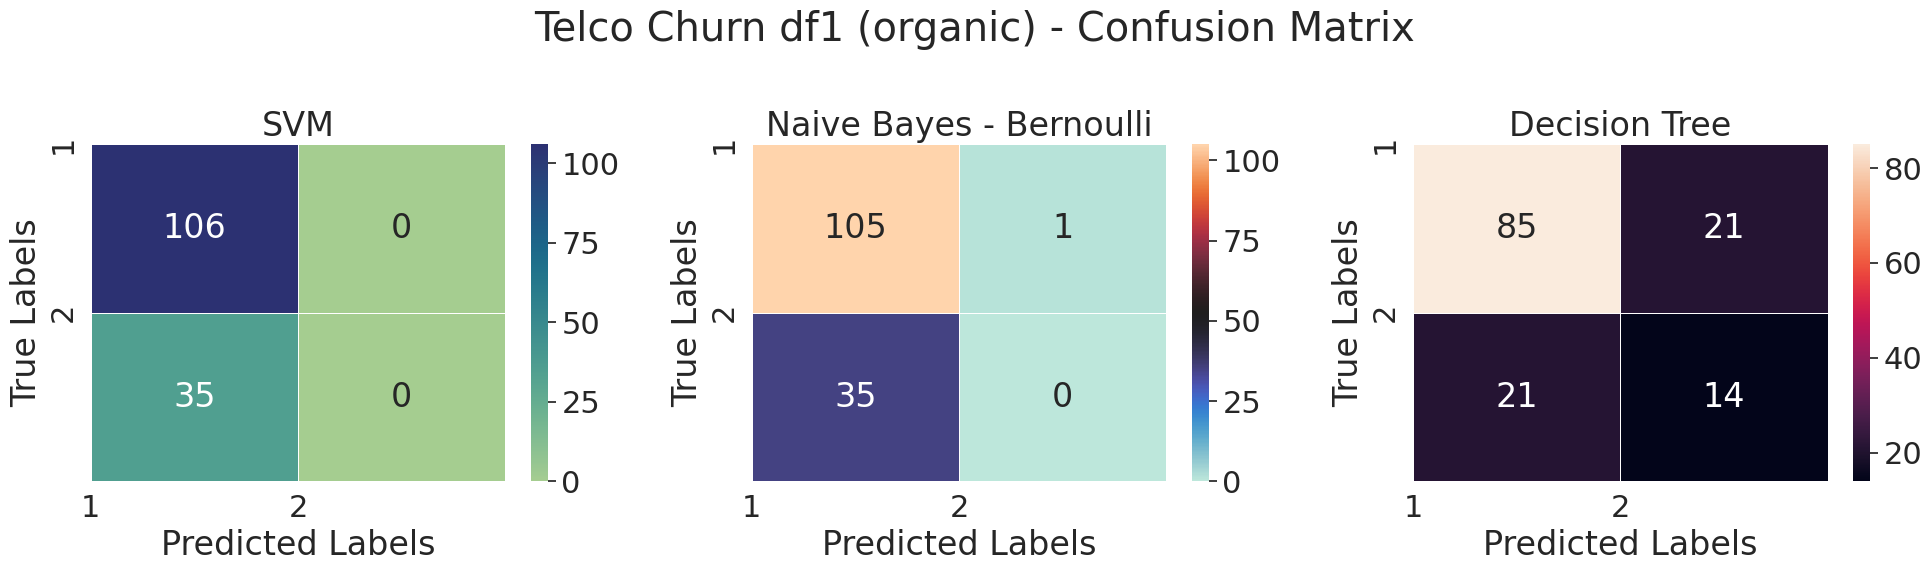

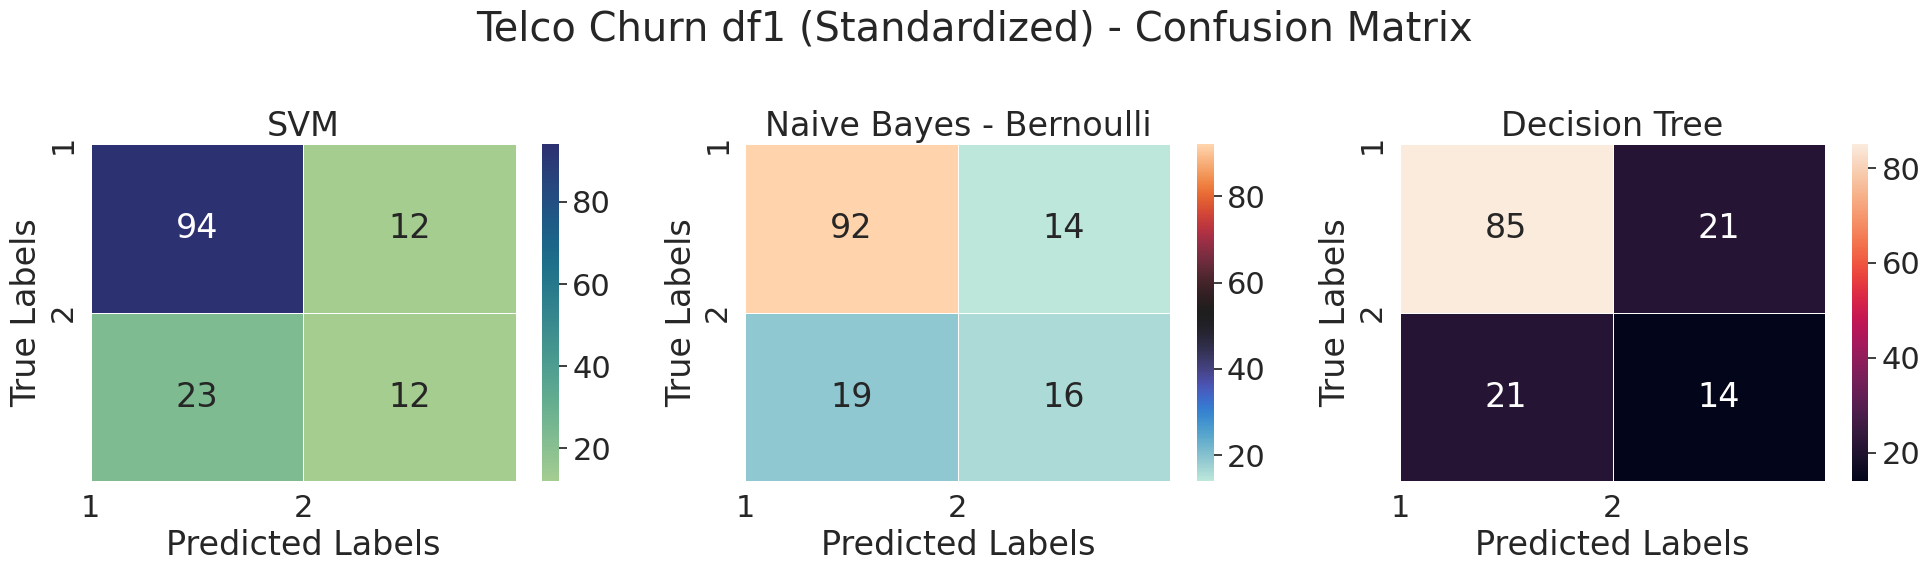

In [ ]:
sns.set(font_scale=2)
ndarray:cm1
ndarray:cm2
ndarray:cm3

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df1 (organic) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm1, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm2, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm3, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

sns.set(font_scale=2)
ndarray:cm4
ndarray:cm5
ndarray:cm6

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df1 (Standardized) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm4, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm5, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm6, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

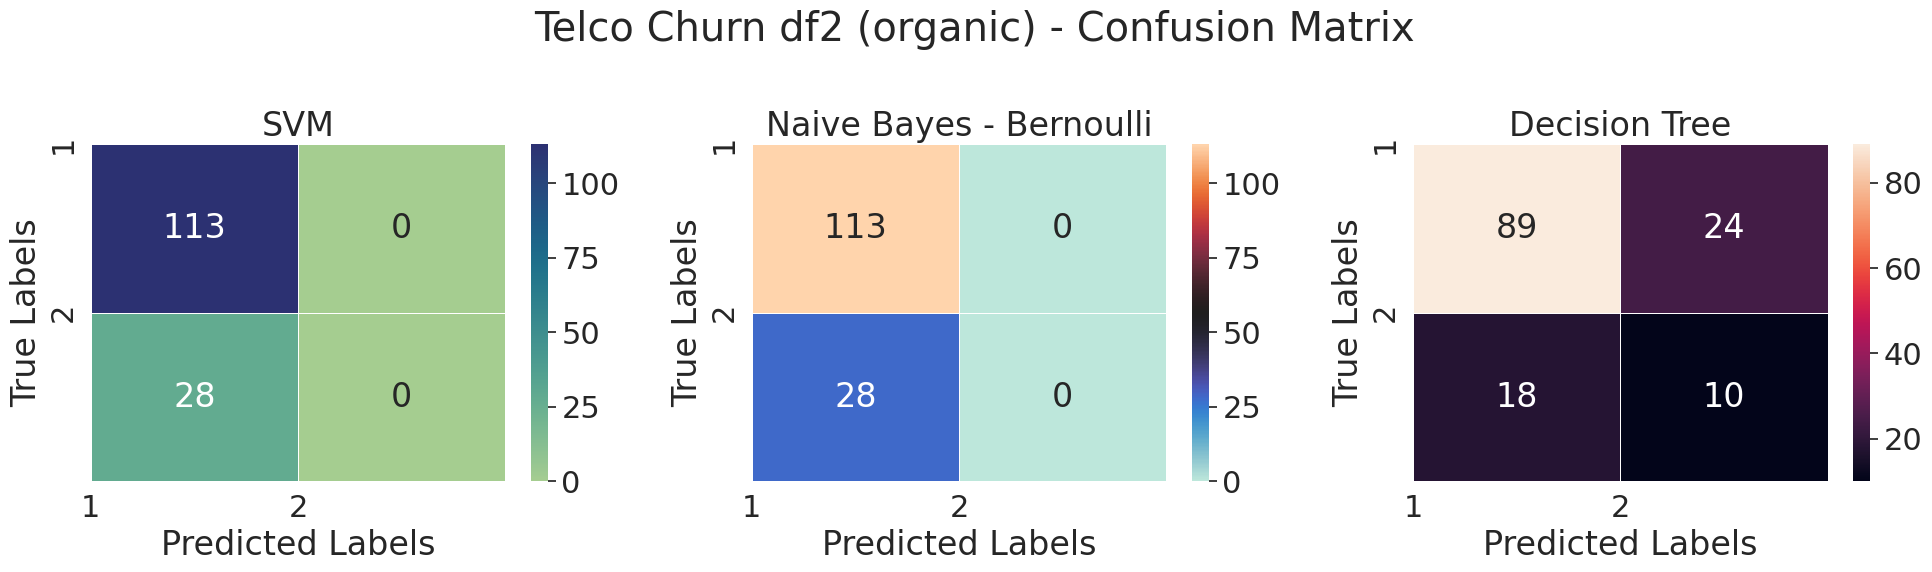

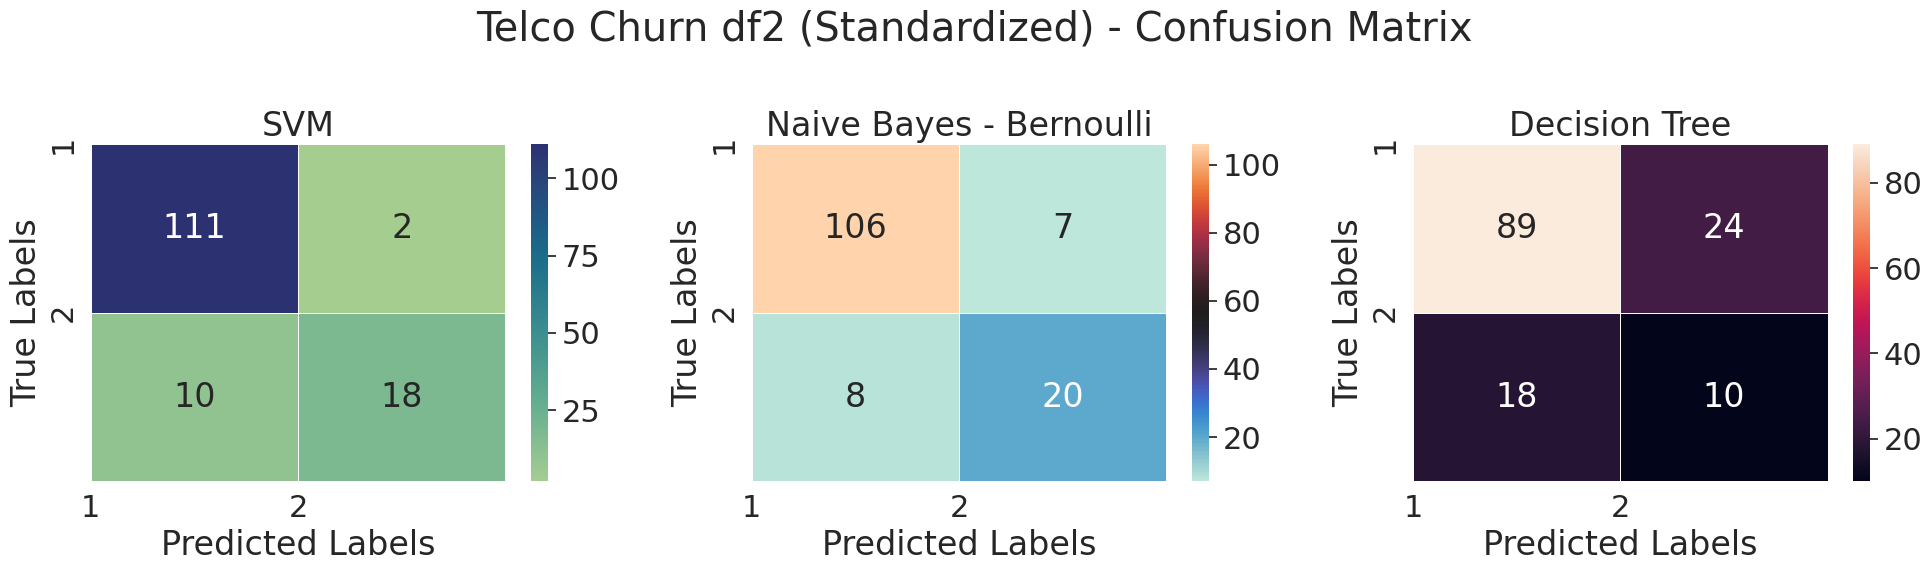

In [ ]:
sns.set(font_scale=2)
ndarray:cm21
ndarray:cm22
ndarray:cm23

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df2 (organic) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm21, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm22, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm23, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

sns.set(font_scale=2)
ndarray:cm24
ndarray:cm25
ndarray:cm26

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df2 (Standardized) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm24, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm25, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm26, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

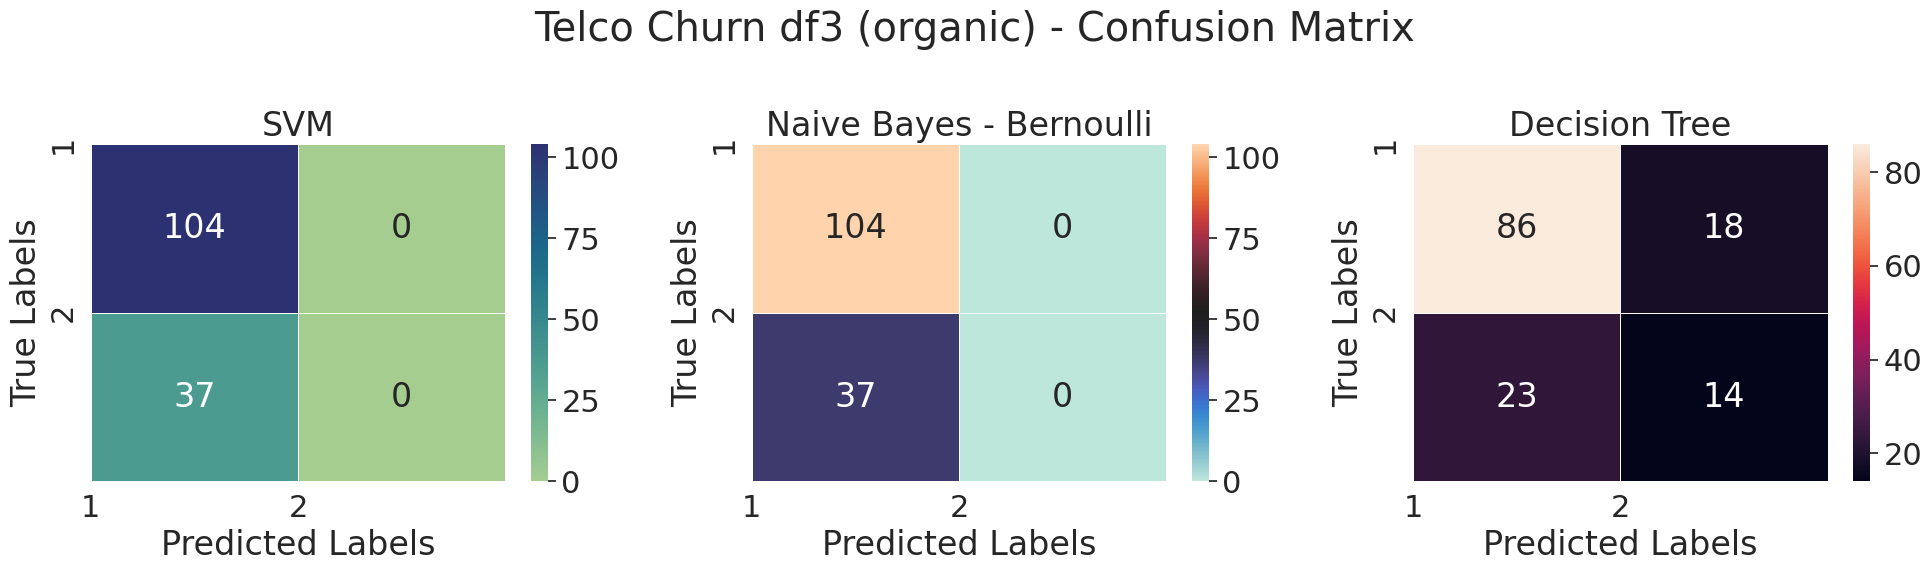

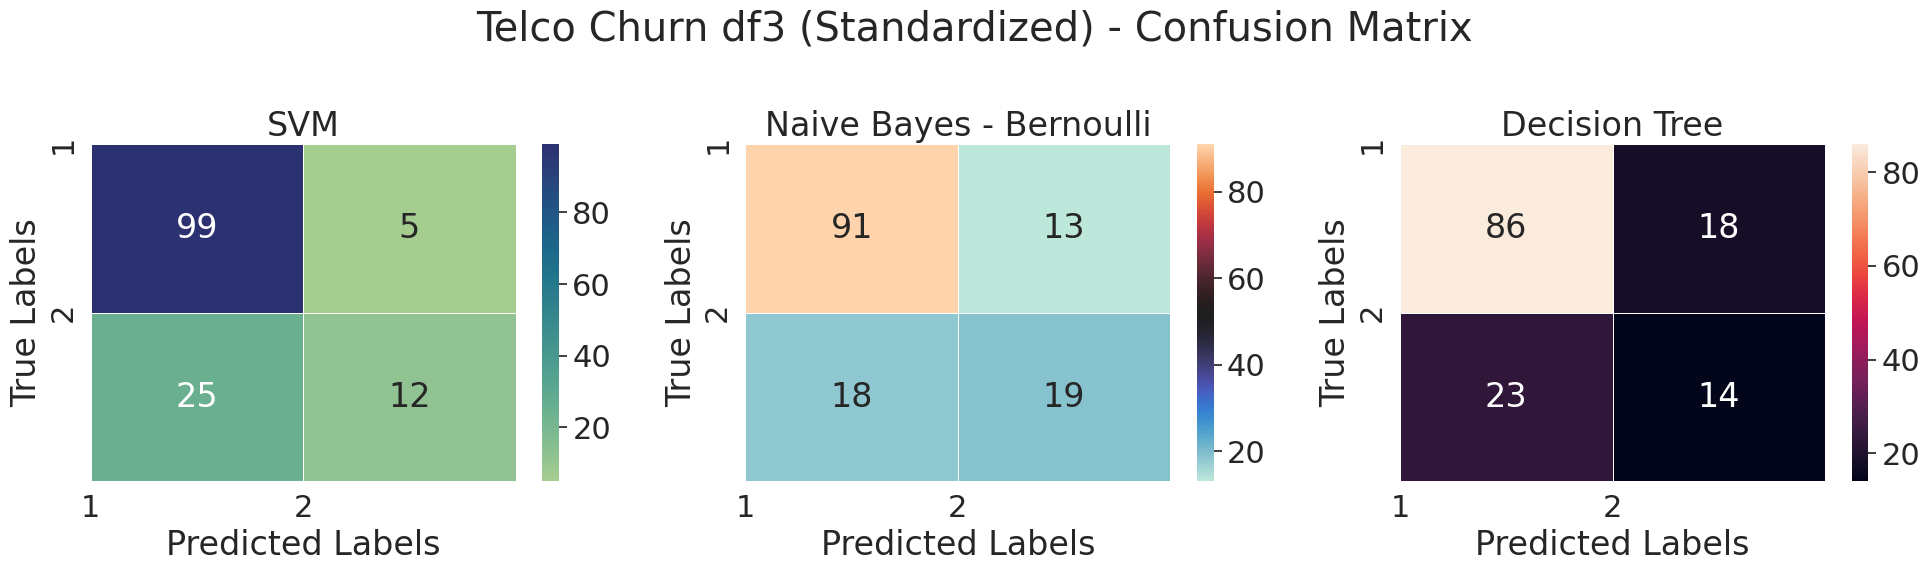

In [ ]:
sns.set(font_scale=2)
ndarray:cm31
ndarray:cm32
ndarray:cm33

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df3 (organic) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm31, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm32, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm33, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()
sns.set(font_scale=2)
ndarray:cm34
ndarray:cm35
ndarray:cm36

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df3 (Standardized) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm34, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm35, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm36, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

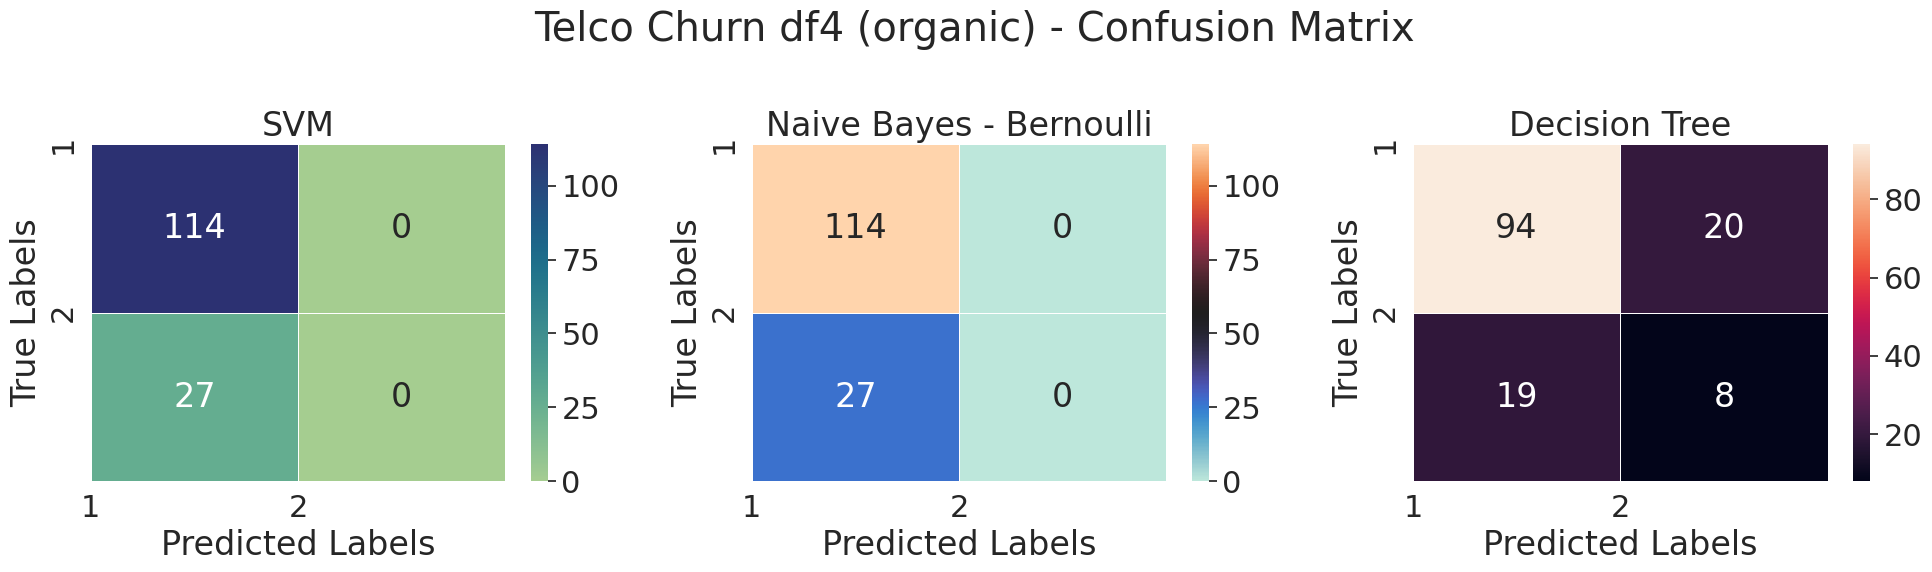

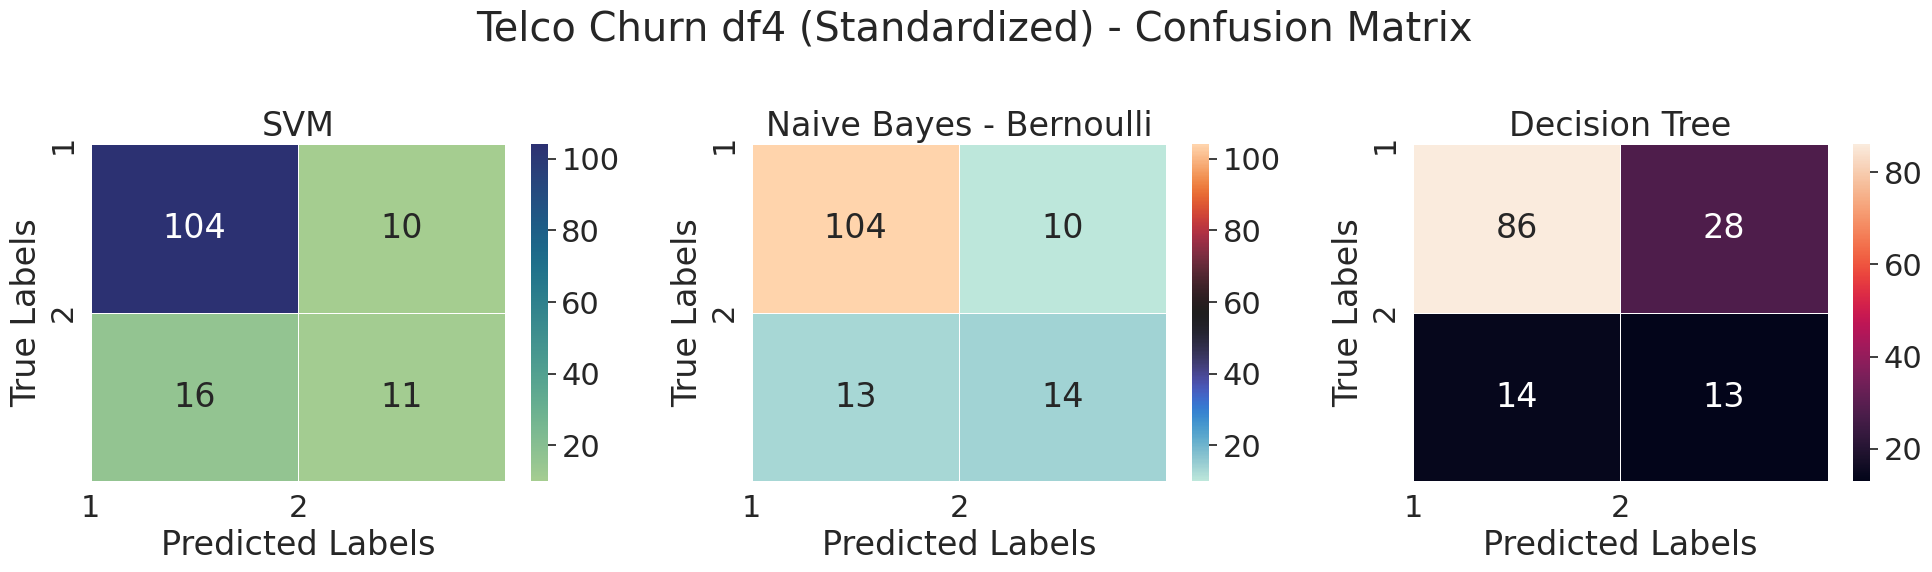

In [ ]:
sns.set(font_scale=2)
ndarray:cm41
ndarray:cm42
ndarray:cm43

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df4 (organic) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm41, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm42, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm43, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

sns.set(font_scale=2)
ndarray:cm44
ndarray:cm45
ndarray:cm46

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df4 (Standardized) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm44, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm45, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm46, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

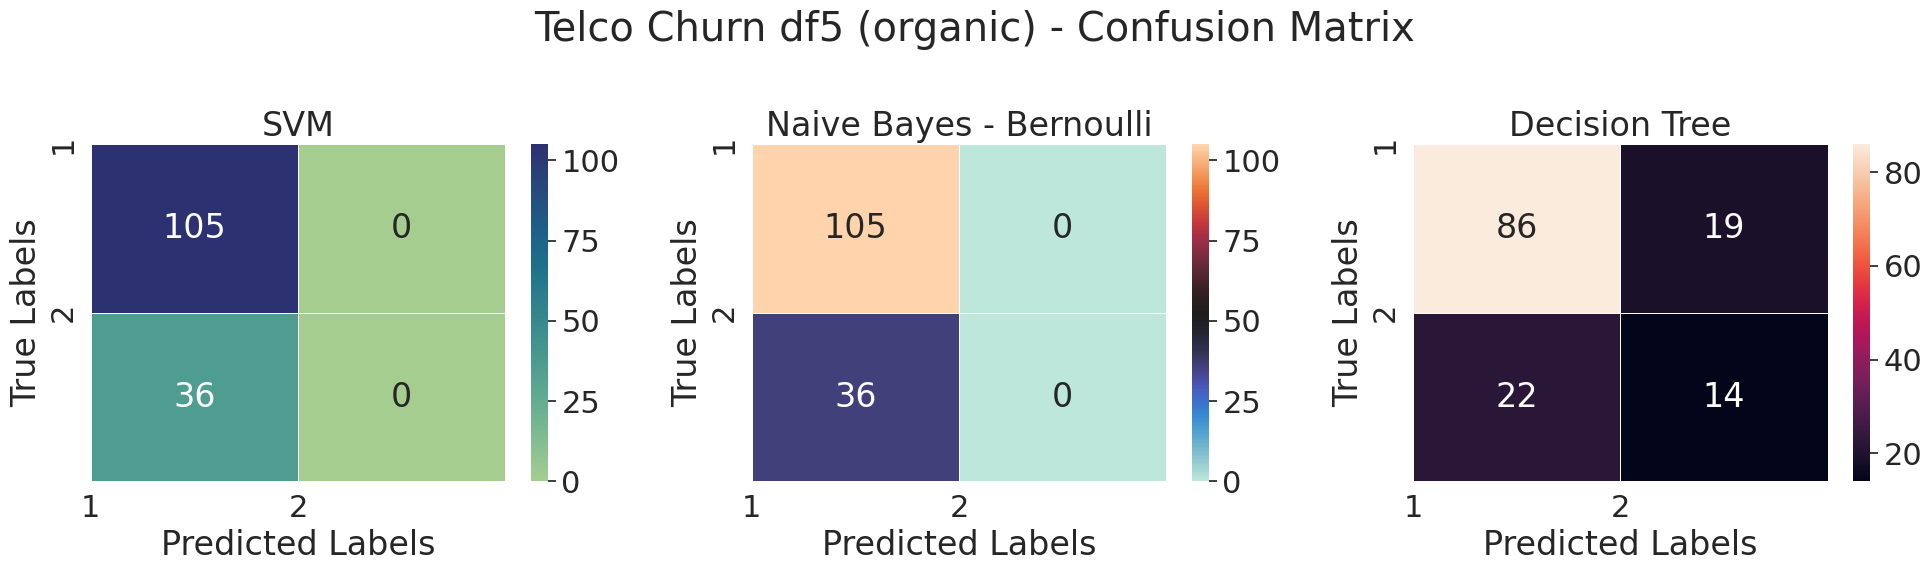

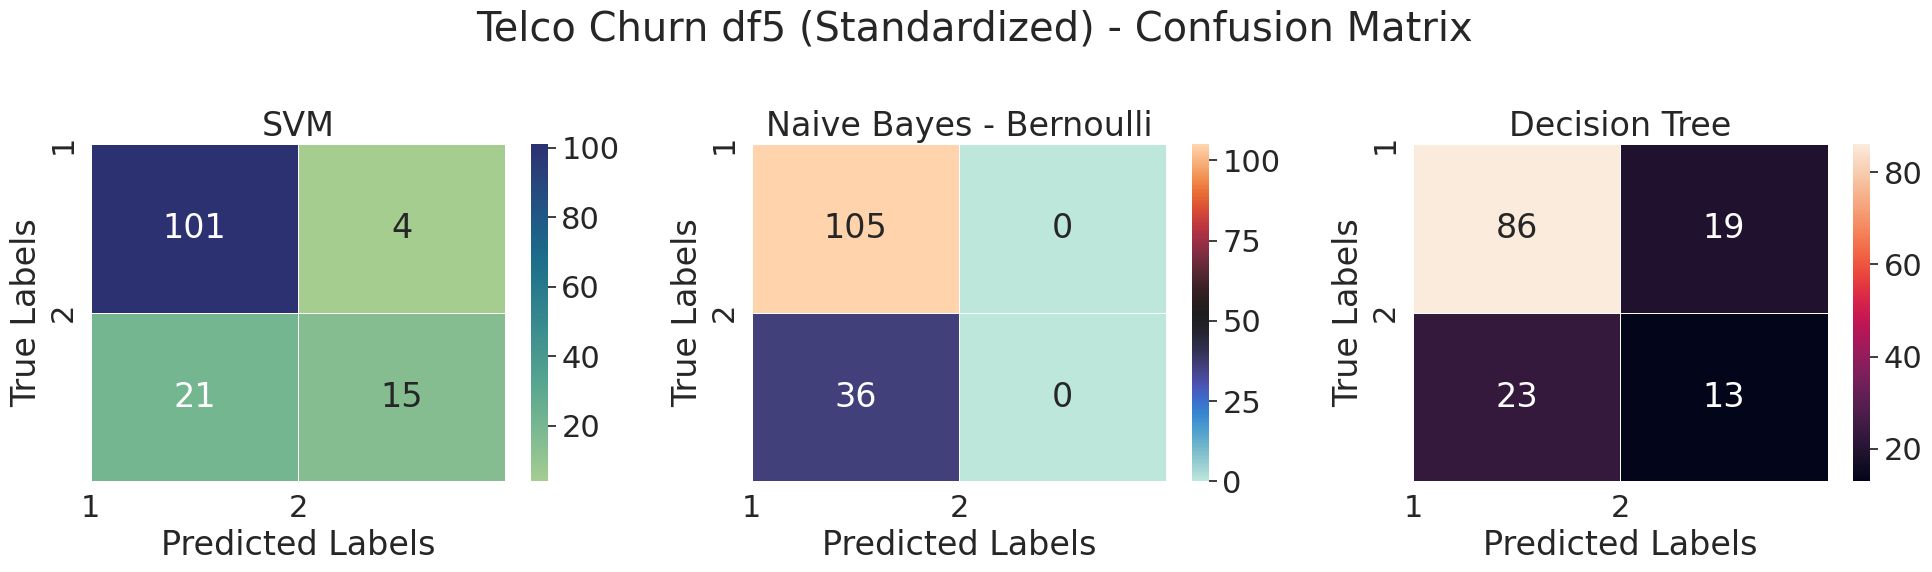

In [ ]:
sns.set(font_scale=2)
ndarray:cm51
ndarray:cm52
ndarray:cm53

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df5 (organic) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm51, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm52, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm53, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

sns.set(font_scale=2)
ndarray:cm54
ndarray:cm55
ndarray:cm56

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,6))

fig.suptitle('Telco Churn df5 (Standardized) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm54, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm55, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('Naive Bayes - Bernoulli')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm56, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('Decision Tree')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

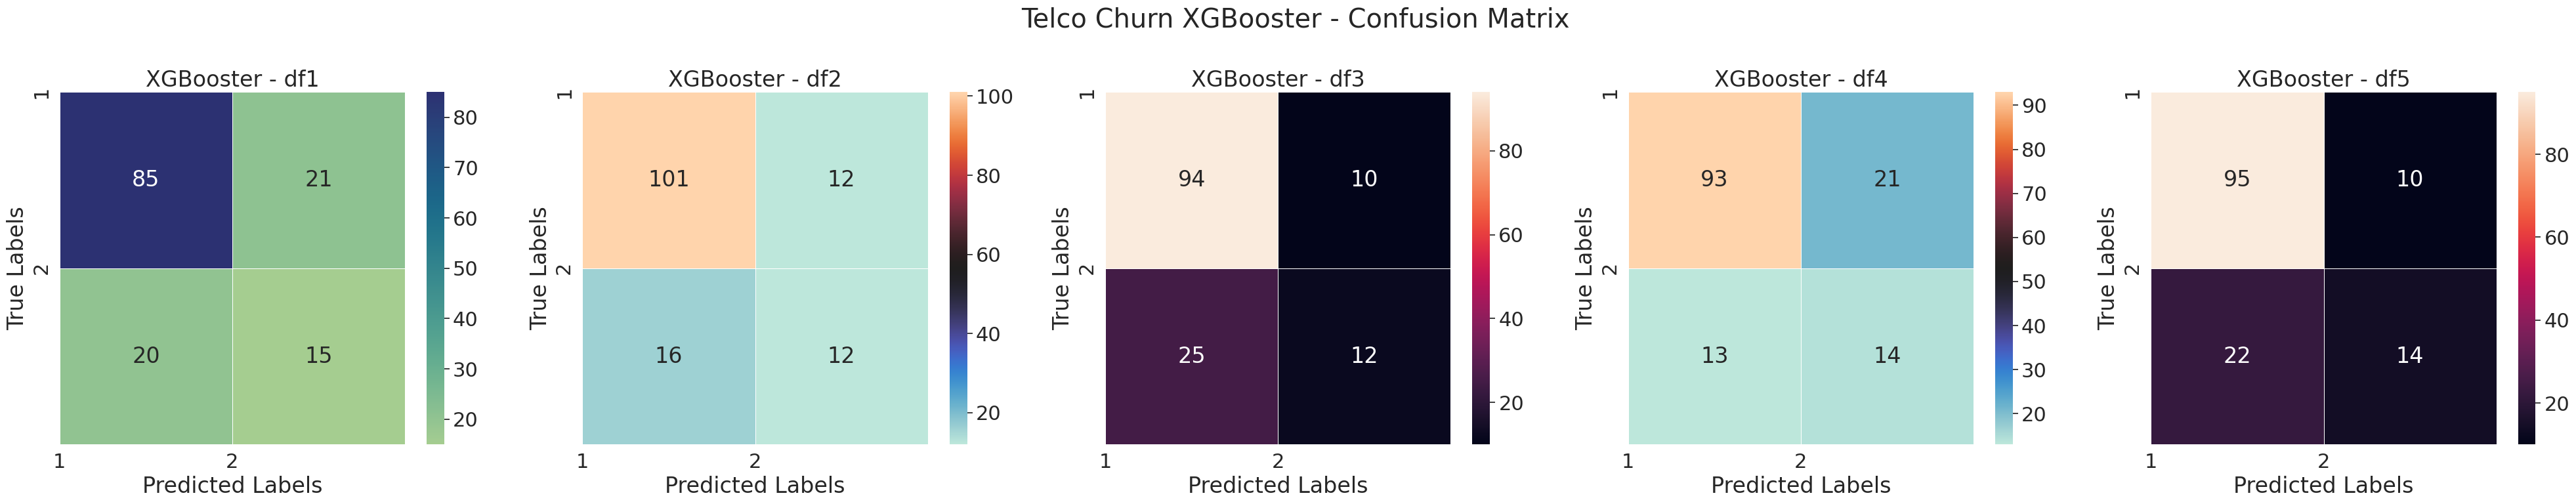

In [ ]:
sns.set(font_scale=2)
ndarray:cm7
ndarray:cm27
ndarray:cm37
ndarray:cm47
ndarray:cm57

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,5, figsize=(40,8))

fig.suptitle('Telco Churn XGBooster - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cm7, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('XGBooster - df1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cm27, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('XGBooster - df2')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cm37, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('XGBooster - df3')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Plot the fourth confusion matrix
sns.heatmap(cm47, ax=axs[3], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[3].set_title('XGBooster - df4')
axs[3].set_xlabel('Predicted Labels')
axs[3].set_ylabel('True Labels')
axs[3].set_xticks([0, 1])
axs[3].set_yticks([0, 1])
axs[3].set_xticklabels(label)
axs[3].set_yticklabels(label)

# Plot the fifth confusion matrix
sns.heatmap(cm57, ax = axs[4], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[4].set_title('XGBooster - df5')
axs[4].set_xlabel('Predicted Labels')
axs[4].set_ylabel('True Labels')
axs[4].set_xticks([0, 1])
axs[4].set_yticks([0, 1])
axs[4].set_xticklabels(label)
axs[4].set_yticklabels(label)

fig.tight_layout()

plt.show()

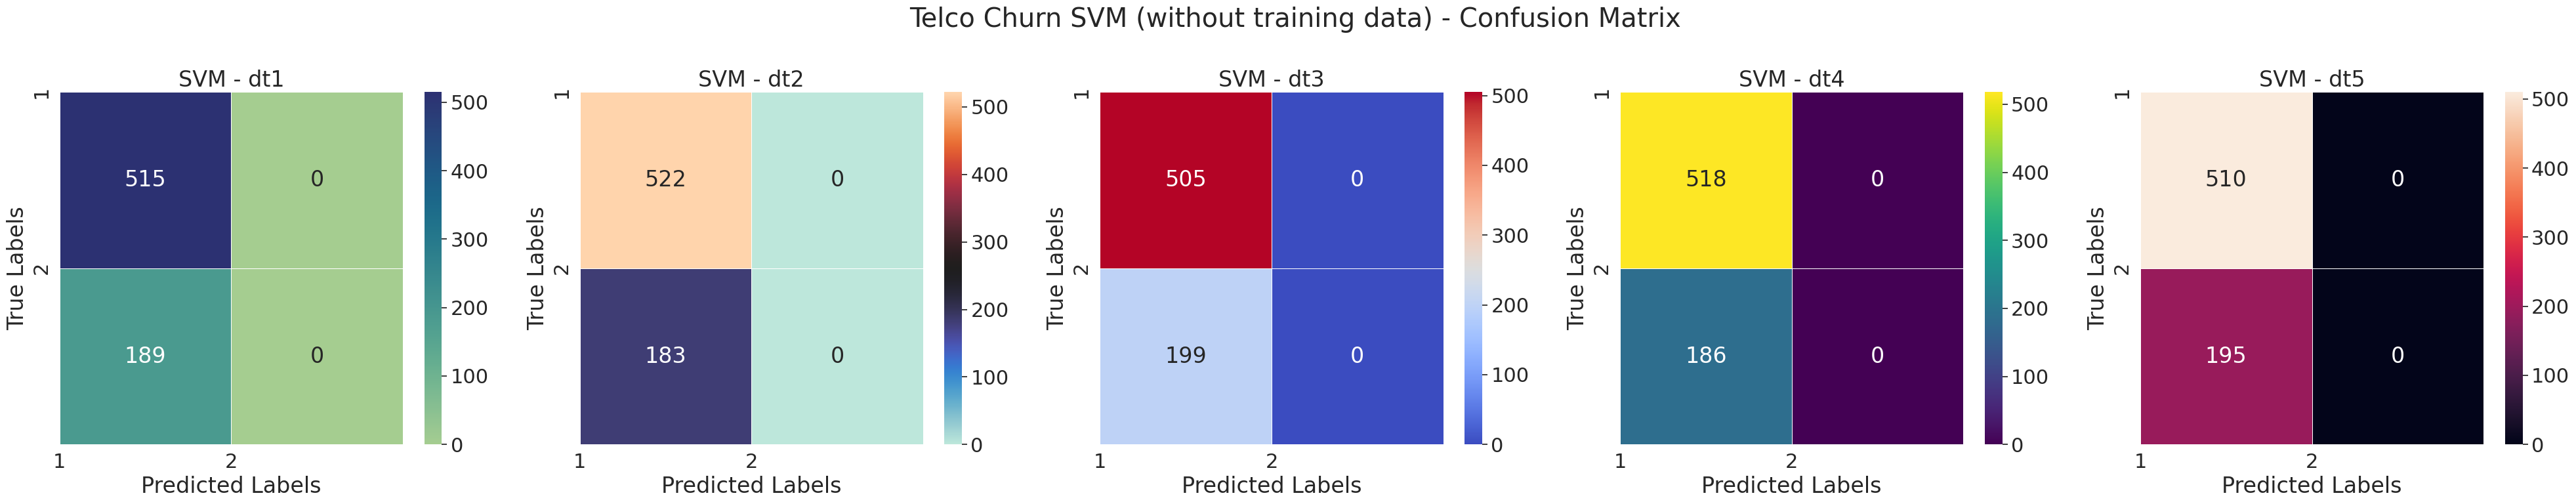

In [ ]:
sns.set(font_scale=2)
ndarray:cmt11
ndarray:cmt21
ndarray:cmt31
ndarray:cmt41
ndarray:cmt51

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,5, figsize=(40,8))

fig.suptitle('Telco Churn SVM (without training data) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cmt11, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('SVM - dt1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cmt21, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('SVM - dt2')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cmt31, ax = axs[2], annot = True, fmt ='d', cmap = 'coolwarm', linewidths =.5)
axs[2].set_title('SVM - dt3')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Plot the fourth confusion matrix
sns.heatmap(cmt41, ax=axs[3], annot=True, fmt='d', cmap = 'viridis',linewidths = .5)
axs[3].set_title('SVM - dt4')
axs[3].set_xlabel('Predicted Labels')
axs[3].set_ylabel('True Labels')
axs[3].set_xticks([0, 1])
axs[3].set_yticks([0, 1])
axs[3].set_xticklabels(label)
axs[3].set_yticklabels(label)

# Plot the fifth confusion matrix
sns.heatmap(cmt51, ax = axs[4], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[4].set_title('SVM - dt5')
axs[4].set_xlabel('Predicted Labels')
axs[4].set_ylabel('True Labels')
axs[4].set_xticks([0, 1])
axs[4].set_yticks([0, 1])
axs[4].set_xticklabels(label)
axs[4].set_yticklabels(label)

fig.tight_layout()

plt.show()

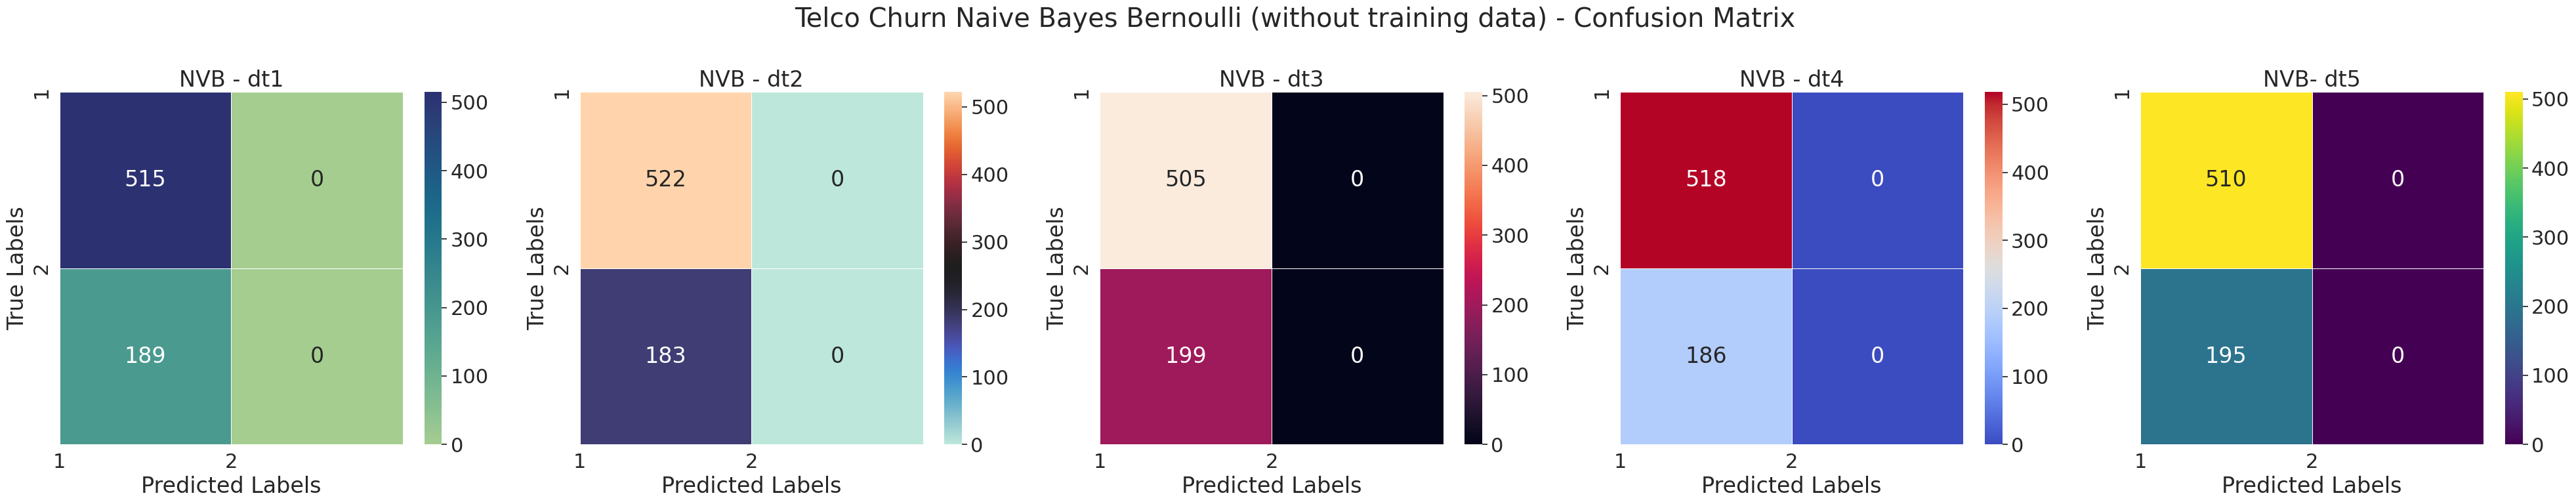

In [ ]:
sns.set(font_scale=2)
ndarray:cmt12
ndarray:cmt22
ndarray:cmt32
ndarray:cmt42
ndarray:cmt52

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,5, figsize=(40,8))

fig.suptitle('Telco Churn Naive Bayes Bernoulli (without training data) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cmt12, ax = axs[0], annot = True, fmt = 'd', cmap = 'crest', linewidths = .5)
axs[0].set_title('NVB - dt1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cmt22, ax=axs[1], annot=True, fmt='d', cmap = 'icefire',linewidths = .5)
axs[1].set_title('NVB - dt2')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cmt32, ax = axs[2], annot = True, fmt ='d', cmap = 'rocket', linewidths =.5)
axs[2].set_title('NVB - dt3')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Plot the fourth confusion matrix
sns.heatmap(cmt42, ax=axs[3], annot=True, fmt='d', cmap = 'coolwarm',linewidths = .5)
axs[3].set_title('NVB - dt4')
axs[3].set_xlabel('Predicted Labels')
axs[3].set_ylabel('True Labels')
axs[3].set_xticks([0, 1])
axs[3].set_yticks([0, 1])
axs[3].set_xticklabels(label)
axs[3].set_yticklabels(label)

# Plot the fifth confusion matrix
sns.heatmap(cmt52, ax = axs[4], annot = True, fmt ='d', cmap = 'viridis', linewidths =.5)
axs[4].set_title('NVB- dt5')
axs[4].set_xlabel('Predicted Labels')
axs[4].set_ylabel('True Labels')
axs[4].set_xticks([0, 1])
axs[4].set_yticks([0, 1])
axs[4].set_xticklabels(label)
axs[4].set_yticklabels(label)

fig.tight_layout()

plt.show()

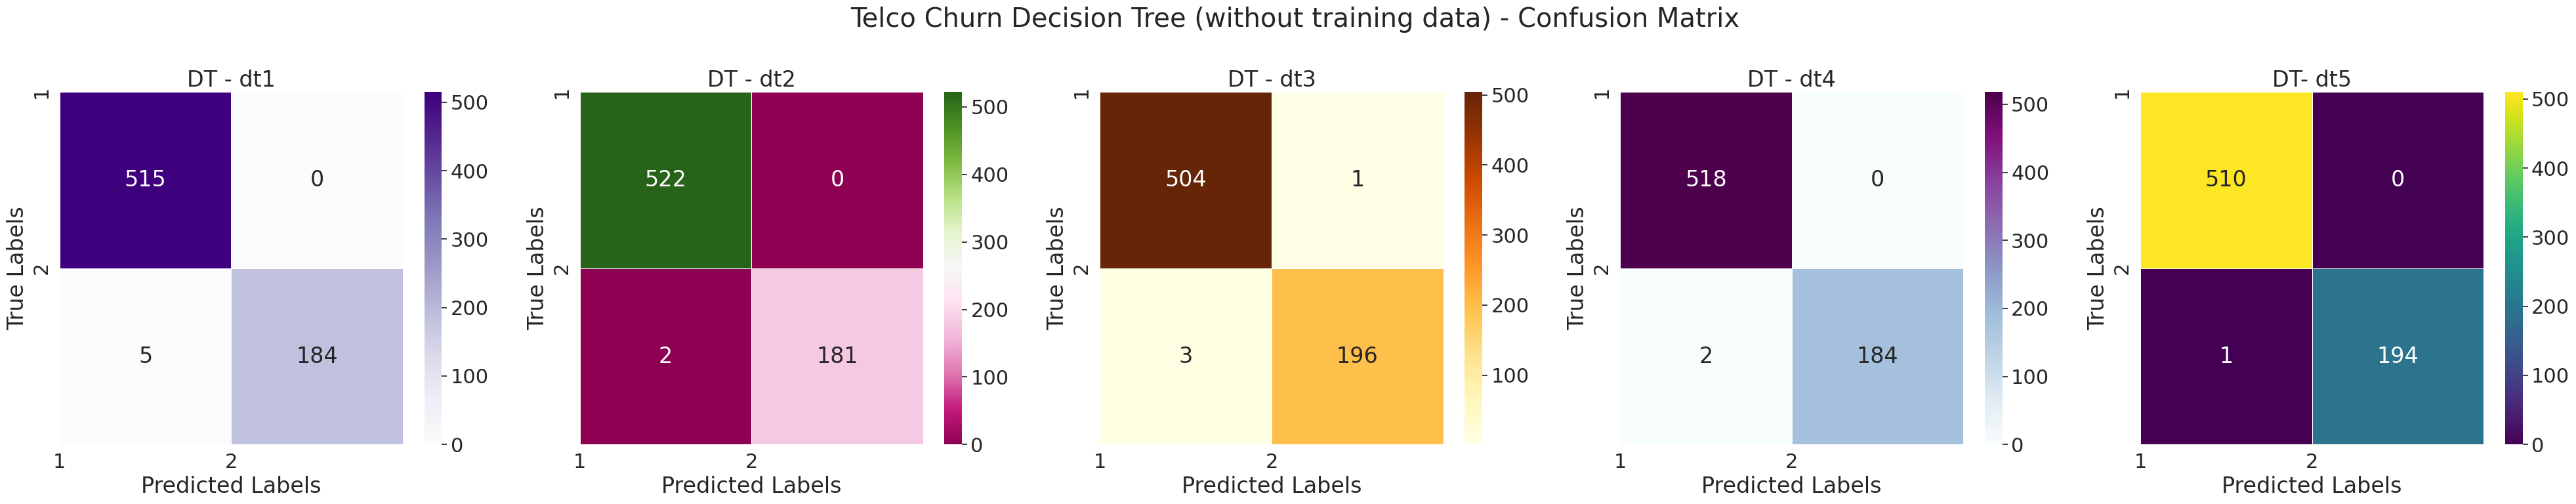

In [ ]:
sns.set(font_scale=2)
ndarray:cmt13
ndarray:cmt23
ndarray:cmt33
ndarray:cmt43
ndarray:cmt53

label = [1,2]

# Create a figure with three subplots
fig, axs = plt.subplots(1,5, figsize=(40,8))

fig.suptitle('Telco Churn Decision Tree (without training data) - Confusion Matrix')

# Plot the first confusion matrix
sns.heatmap(cmt13, ax = axs[0], annot = True, fmt = 'd', cmap = "Purples", linewidths = .5)
axs[0].set_title('DT - dt1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(label)
axs[0].set_yticklabels(label)

# Plot the second confusion matrix
sns.heatmap(cmt23, ax=axs[1], annot=True, fmt='d', cmap = "PiYG",linewidths = .5)
axs[1].set_title('DT - dt2')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(label)
axs[1].set_yticklabels(label)

# Plot the third confusion matrix
sns.heatmap(cmt33, ax = axs[2], annot = True, fmt ='d', cmap = "YlOrBr", linewidths =.5)
axs[2].set_title('DT - dt3')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1])
axs[2].set_yticks([0, 1])
axs[2].set_xticklabels(label)
axs[2].set_yticklabels(label)

# Plot the fourth confusion matrix
sns.heatmap(cmt43, ax=axs[3], annot=True, fmt='d', cmap = "BuPu",linewidths = .5)
axs[3].set_title('DT - dt4')
axs[3].set_xlabel('Predicted Labels')
axs[3].set_ylabel('True Labels')
axs[3].set_xticks([0, 1])
axs[3].set_yticks([0, 1])
axs[3].set_xticklabels(label)
axs[3].set_yticklabels(label)

# Plot the fifth confusion matrix
sns.heatmap(cmt53, ax = axs[4], annot = True, fmt ='d', cmap = 'viridis', linewidths =.5)
axs[4].set_title('DT- dt5')
axs[4].set_xlabel('Predicted Labels')
axs[4].set_ylabel('True Labels')
axs[4].set_xticks([0, 1])
axs[4].set_yticks([0, 1])
axs[4].set_xticklabels(label)
axs[4].set_yticklabels(label)

fig.tight_layout()

plt.show()

**Result Analysis:**

I evaluated two datasets using distinct machine learning approaches. The first dataset demonstrated strong performance when processed with the Support Vector Machine (SVM) algorithm and the standardization method, yielding an accuracy of 81.84%. This highlights the impact of feature scaling in optimizing classification results. Meanwhile, the second dataset, despite lacking prior training, achieved an exceptional accuracy of 99.60% with the Decision Tree classification algorithm. This outcome underscores the model’s ability to efficiently handle raw data and make precise predictions. These insights provide valuable guidance in selecting appropriate algorithms based on dataset characteristics.

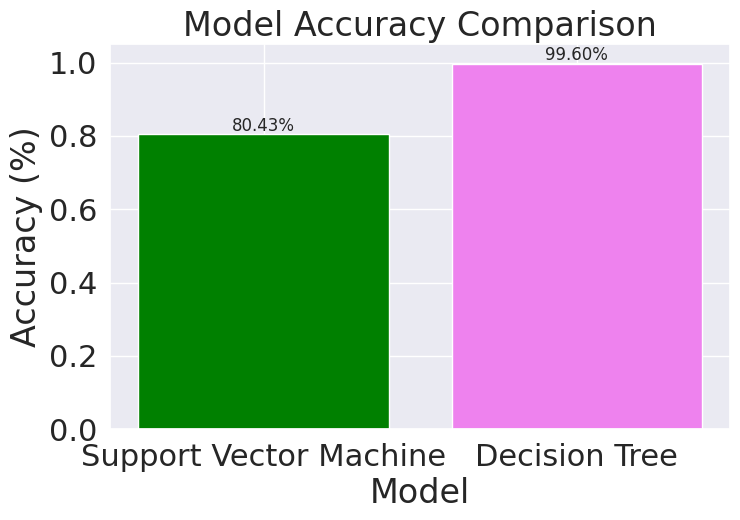

In [ ]:
models = ["Support Vector Machine", "Decision Tree"]
accuracy = [anvbs, adt1]
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['green', 'violet'])
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1.05)
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=12)
plt.show()

Voting Classifier
Let's now predict the final model based on the highest majority of voting and check it's score.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = SVC()
clf2 = BernoulliNB()
clf3 = DecisionTreeClassifier(random_state=234)
clf4 = xgb.XGBClassifier()
eclf1 = VotingClassifier(estimators=[('SVC', clf1), ('BernoulliNB', clf2), ('DecisionTreeClassifier', clf3), ('XGBoost', clf4)], voting='hard')
eclf2 = VotingClassifier(estimators=[('SVC', clf1), ('BernoulliNB', clf2), ('DecisionTreeClassifier', clf3), ('XGBoost', clf4)], voting='hard')
eclf3 = VotingClassifier(estimators=[('SVC', clf1), ('BernoulliNB', clf2), ('DecisionTreeClassifier', clf3), ('XGBoost', clf4)], voting='hard')
eclf4 = VotingClassifier(estimators=[('SVC', clf1), ('BernoulliNB', clf2), ('DecisionTreeClassifier', clf3), ('XGBoost', clf4)], voting='hard')
eclf5 = VotingClassifier(estimators=[('SVC', clf1), ('BernoulliNB', clf2), ('DecisionTreeClassifier', clf3), ('XGBoost', clf4)], voting='hard')
eclf1.fit(x_train1, y_train1)
eclf2.fit(x_train2, y_train2)
eclf3.fit(x_train3, y_train3)
eclf4.fit(x_train4, y_train4)
eclf5.fit(x_train5, y_train5)
predictions1 = eclf1.predict(x_test1)
predictions2 = eclf2.predict(x_test2)
predictions3 = eclf3.predict(x_test3)
predictions4 = eclf4.predict(x_test4)
predictions5 = eclf5.predict(x_test5)
print("Final Accuracy Score")
print(accuracy_score(y_test1, predictions1))
print(accuracy_score(y_test2, predictions2))
print(accuracy_score(y_test3, predictions3))
print(accuracy_score(y_test4, predictions4))
print(accuracy_score(y_test5, predictions5))

Final Accuracy Score
0.75177304964539
0.8014184397163121
0.7375886524822695
0.8085106382978723
0.7446808510638298
